<h2 style='text-align:center;'><u>WEEK 11, 3MTT CAPSTONE PROJECT - DATA SCIENCE, TECHNICAL REPORT</u></h2>
<h1 style='text-align:center;'><u>Fellow ID: FE/23/46680324</u></h1>



The file was downloaded from the https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge and the zip file was extracted.
The data cleaning, exploratory data analysis (EDA), and predictive models were developed on the csv file in Kaggle folder extracted from the downloaded file to forecast COVID-19 trends. Findings were presented through visualizations and final report is provided summarizing insights and recommendations for public health responses. Python, SQL were used on Jupyter notebook and MySQL workbench respectively and Excel was used where necessary.<br>

<h1 style='text-align:left;'><u>Tools</u></h1><br>
1.	JUPYTER NOTEBOOK: For data processing, EDA, Model development, and data visualization and reporting<br>
2.	MySQL WORKBENCH: For some data manipulations<br>
3.	EXCEL: For data cleaning, Transformation using power Query and excel formula.<br>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt #Visualisation library

from numerize import numerize
import plotly.express as px
import os
import re # to extract numbers from text

import pymysql # connecting an SQL database with jupyter notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing the population folder containing six csv file as a data frame 'population'

Before importing the folder, the following cleaning was carried out in excel to make the six csv file column names consistent;
1. 'Strength of Evidence':'Measure of Evidence' on 'Management of patients who are underhoused or otherwise lower social economic status.csv' file and
2. 'Proposed Solution':'Solution' on 'What are ways to create hospital infrastructure to prevent nosocomial outbreaks_.csv' file.

#### 1. Population

In [3]:
files=[file for file in os.listdir('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/1_population/')]

In [4]:
population=pd.DataFrame()
for file in files:
    data=pd.read_csv('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/1_population/'+file)
    population=pd.concat([population,data], ignore_index=True)
    
population=population.loc[:,~population.columns.str.contains('^Unnamed')]
population

,Date,Study,Study Link,Journal,Study Type,Addressed Population,Challenge,Solution,Measure of Evidence,Added on,Added On
0,2020-04-15,COVID-19 outbreak at a large homeless shelter ...,https://doi.org/10.1101/2020.04.12.20059618,medRxiv,Retrospective Observational Study,Homeless,Evolving Cluster of COVID Cases in a Homeless ...,"Universal PCR testing, rather than a symptom t...",patients: 408,4/22/2020,NaN
1,2020-04-15,Multidisciplinary research priorities for the ...,https://doi.org/10.1016/S2215-0366(20)30168-1,The Lancet: Psychiatry,Expert Review,Psychiatric Illness,Impact on Mental Health Services from the Pand...,Multidisciplinary mental health science resear...,-,4/22/2020,NaN
2,2020-04-11,U.S. county-level characteristics to inform eq...,https://doi.org/10.1101/2020.04.08.20058248,MedRxiv,Simulation,Poverty and Uninsured,Not all Americans are equally at risk of infec...,Both the federal and state governments will be...,countries: USA,4/22/2020,NaN
3,2020-04-10,Epidemiology of COVID-19 among people experien...,http://hdl.handle.net/2027.42/154734,"Annals of Family Medicine, COVID-19 Collection",Case Series,Homeless,People experiencing homelessness in Boston are...,Municipalities with sizable homeless populatio...,patients: 182,4/22/2020,NaN
4,2020-04-07,The Challenge of Preventing COVID-19 Spread in...,https://jamanetwork.com/journals/jama/fullarti...,Journal of American Medical Association,Editorial,Incarcerated,Social distancing to minimize transmission of ...,Releasing incarceated Individuals and increase...,-,4/22/2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...
231,2020-02-26,Transmission Potential of SARS-CoV-2 in Viral ...,https://doi.org/10.1101/2020.03.23.20039446,medRxiv,Retrospective observational study,Health-care staff,Viral Shedding,"SARS-CoV-2 is shed during respiration, toileti...",patients: 13,4/22/2020,NaN
232,2020-02-24,Staff safety during emergency airway managemen...,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Lancet Respiratory Medicine,Expert Review,Health-care staff,Staff safety,Safety during patient intubation and ventilation,studies: 5,4/22/2020,NaN
233,2020-02-22,Reply to “Coronavirus 2019-nCoV: A brief persp...,https://doi.org/10.1016/j.jinf.2020.03.036,Journal of Infection,Retrospective observational study,Health-care staff,Nosocomial SARS-CoV-2 infection,"Medical waste protocols, nursing flow -- work ...",nurses: 38,4/26/2020,NaN
234,2020-02-13,Protecting health-care workers from subclinica...,https://www.thelancet.com/journals/lanres/arti...,Lancet Respiratory Medicine,Expert Review,Health-care staff,Protecting health-care workers,Use of PPE during asymptomatic spread,studies: 5,4/22/2020,NaN


In [5]:
population.columns

Index(['Date', 'Study', 'Study Link', 'Journal', 'Study Type',
       'Addressed Population', 'Challenge', 'Solution', 'Measure of Evidence',
       'Added on', 'Added On'],
      dtype='object')

#### extracting selected columns

In [6]:
population=population[[ 'Addressed Population', 'Challenge', 'Solution', 'Measure of Evidence']]
population

,Addressed Population,Challenge,Solution,Measure of Evidence
0,Homeless,Evolving Cluster of COVID Cases in a Homeless ...,"Universal PCR testing, rather than a symptom t...",patients: 408
1,Psychiatric Illness,Impact on Mental Health Services from the Pand...,Multidisciplinary mental health science resear...,-
2,Poverty and Uninsured,Not all Americans are equally at risk of infec...,Both the federal and state governments will be...,countries: USA
3,Homeless,People experiencing homelessness in Boston are...,Municipalities with sizable homeless populatio...,patients: 182
4,Incarcerated,Social distancing to minimize transmission of ...,Releasing incarceated Individuals and increase...,-
...,...,...,...,...
231,Health-care staff,Viral Shedding,"SARS-CoV-2 is shed during respiration, toileti...",patients: 13
232,Health-care staff,Staff safety,Safety during patient intubation and ventilation,studies: 5
233,Health-care staff,Nosocomial SARS-CoV-2 infection,"Medical waste protocols, nursing flow -- work ...",nurses: 38
234,Health-care staff,Protecting health-care workers,Use of PPE during asymptomatic spread,studies: 5


#### Exporting the population dataframe as a csv file as '1. population'

In [7]:
path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\1. Population.csv'
population.to_csv(path)

#### Removing the unnmaed column fro the imported data frame

In [8]:
population=pd.read_csv('C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\1. Population.csv')
population=population.loc[:,~population.columns.str.contains('^Unnamed')]
population

,Addressed Population,Challenge,Solution,Measure of Evidence
0,Homeless,Evolving Cluster of COVID Cases in a Homeless ...,"Universal PCR testing, rather than a symptom t...",patients: 408
1,Psychiatric Illness,Impact on Mental Health Services from the Pand...,Multidisciplinary mental health science resear...,-
2,Poverty and Uninsured,Not all Americans are equally at risk of infec...,Both the federal and state governments will be...,countries: USA
3,Homeless,People experiencing homelessness in Boston are...,Municipalities with sizable homeless populatio...,patients: 182
4,Incarcerated,Social distancing to minimize transmission of ...,Releasing incarceated Individuals and increase...,-
...,...,...,...,...
231,Health-care staff,Viral Shedding,"SARS-CoV-2 is shed during respiration, toileti...",patients: 13
232,Health-care staff,Staff safety,Safety during patient intubation and ventilation,studies: 5
233,Health-care staff,Nosocomial SARS-CoV-2 infection,"Medical waste protocols, nursing flow -- work ...",nurses: 38
234,Health-care staff,Protecting health-care workers,Use of PPE during asymptomatic spread,studies: 5


#### Excel was used to extract only numbers from 'Measure of evidence' column as a new column 'Sample Size'. the records wit no numerical values on the sample size column are represented by '#VALUE!'

In [9]:
population_clean=pd.read_csv('C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\1. Population_cleaned.csv')
population_clean=population_clean.loc[:,~population_clean.columns.str.contains('^Unnamed')]
population_clean.tail(50)

,Addressed Population,Challenge,Solution,Measure of Evidence,Sample Size
186,Health-care staff and drug development,"Superinfections, AMR and antimicrobial develop...",Results from carefully designed studies early ...,studies: 16,16
187,Health-care staff,Hospitals are significant epicenters for the h...,"Ensure adequate environmental cleaning, streng...",surface swabs: 626,626
188,Pediatric staff,Rapid implementation of an adult unit,"Pediatric team screened, admitted, and cared f...",patients: 100,100
189,Cancer unit staff,Nosocomial infections,Develop a risk model based on the experience o...,surveys: 83,83
190,Ophthalmology staff,Limiting the Risks for Eye Care Professionals,Strategies and recommendations for ophthalmolo...,studies: 29,29
191,Surgical staff,Surgical Infection,"Patient Environment, Peri-Operative Considerat...",studies: 36,36
192,prevention and management of COVID-19 outbreak...,Reduce hospital transmission,Lays out the plan for disease prevention and c...,studies: 4,4
193,Health-care staff,N95 respirators reused,Heating (dry or in the presence humidity) <100...,samples: 3,3
194,Trauma/surgical staff,Trauma and emergency surgery preparation,(1) General recommendation for surgical servic...,studies: 17,17
195,Psychiatry staff,Recommendations for prevention,10 recommendations for prevention: including e...,cases: 200,200


#### Remove the records that has '#VALUE!' on the sample size column from the dataframe

In [10]:
population_clean=population_clean[population_clean['Sample Size']!='#VALUE!']

In [11]:
population_clean=population_clean[['Addressed Population', 'Challenge', 'Solution', 'Sample Size']]
population_clean['Sample Size']=population_clean['Sample Size'].astype('int64')
population_clean

,Addressed Population,Challenge,Solution,Sample Size
0,Homeless,Evolving Cluster of COVID Cases in a Homeless ...,"Universal PCR testing, rather than a symptom t...",408
3,Homeless,People experiencing homelessness in Boston are...,Municipalities with sizable homeless populatio...,182
24,Health Care Workers,Contact tracing,RTLS-based contact tracing showed higher sensi...,796
25,General population,social distancing measures,potential danger of exponential spread in the ...,182004
27,Diabetes/quarantined,management of diabetes,Patients have reported that they were able to ...,100
...,...,...,...,...
231,Health-care staff,Viral Shedding,"SARS-CoV-2 is shed during respiration, toileti...",13
232,Health-care staff,Staff safety,Safety during patient intubation and ventilation,5
233,Health-care staff,Nosocomial SARS-CoV-2 infection,"Medical waste protocols, nursing flow -- work ...",38
234,Health-care staff,Protecting health-care workers,Use of PPE during asymptomatic spread,5


#### EDA on the addressed population column

#### Top 13 Most Address Population

In [12]:
population_clean['Addressed Population'].nunique()

55

In [13]:
population_clean['Addressed Population']=population_clean['Addressed Population'].replace(to_replace='Health-care staff',value='Health Care Staff')

In [14]:
population_clean['Addressed Population'].value_counts().sort_values(ascending=False).head(13)

Health Care Staff                       25
General population                      13
Critical Care Units                      7
Trachiostomy staff                       3
Health-care staff and administration     3
Quarantined population                   3
Health care workers                      2
GI staff                                 2
Healthcare providers                     2
Patients                                 2
Health Care Workers                      2
Surgical staff                           2
Homeless                                 2
Name: Addressed Population, dtype: int64

#### Creating a dataframe of the thirdteen most addressed population

In [15]:
most_addressed_pop=population_clean[ (population_clean['Addressed Population']=='Health-care staff')|
                      (population_clean['Addressed Population']=='General population')|
                      (population_clean['Addressed Population']=='Critical Care Units')|
                      (population_clean['Addressed Population']=='Trachiostomy staff')|
                      (population_clean['Addressed Population']=='Health-care staff and administration')|
                      (population_clean['Addressed Population']=='Quarantined population')|
                      (population_clean['Addressed Population']=='Health care workers')|
                      (population_clean['Addressed Population']=='GI staff')|
                      (population_clean['Addressed Population']=='Sterile services')|
                      (population_clean['Addressed Population']=='Patients')|
                      (population_clean['Addressed Population']=='Health Care Workers')|
                      (population_clean['Addressed Population']=='Surgical staff')|
                      (population_clean['Addressed Population']=='Homeless')]

most_addressed_pop.reset_index(drop=True)

,Addressed Population,Challenge,Solution,Sample Size
0,Homeless,Evolving Cluster of COVID Cases in a Homeless ...,"Universal PCR testing, rather than a symptom t...",408
1,Homeless,People experiencing homelessness in Boston are...,Municipalities with sizable homeless populatio...,182
2,Health Care Workers,Contact tracing,RTLS-based contact tracing showed higher sensi...,796
3,General population,social distancing measures,potential danger of exponential spread in the ...,182004
4,General population,physical distancing policies sufficient,Tracking behavioural change can give a more ra...,3824
5,General population,Face mask use by the general public for limiti...,face masks used in conjunction with other non-...,2
6,Health Care Workers,"More difficult donning or doffing, less user c...","Face-to-face training in PPE, covering more pa...",242278
7,General population,Poor risk communication and heightened risk pe...,"Utilizing social media channels, and ensuring ...",36
8,General population,"Initial high levels of support for, and adhere...",Rapid response in public health programming,27
9,General population,"Found that younger, less educated individuals ...",Communication campaigns (showing how distancin...,2251


#### Extracting the 'Addressed Population','Sample Size' from the dataframe

In [16]:
mp=most_addressed_pop[['Addressed Population','Sample Size']]
mp

,Addressed Population,Sample Size
0,Homeless,408
3,Homeless,182
24,Health Care Workers,796
25,General population,182004
31,General population,3824
38,General population,2
40,Health Care Workers,242278
42,General population,36
43,General population,27
44,General population,2251


In [17]:
path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\m_p.csv'
mp.to_csv(path)

In [18]:
mp=pd.read_csv('C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\m_p.csv')
mp=mp.loc[:,~mp.columns.str.contains('^Unnamed')]
#population_clean
mp

,Addressed Population,Sample Size
0,Homeless,408
1,Homeless,182
2,Health Care Workers,796
3,General population,182004
4,General population,3824
5,General population,2
6,Health Care Workers,242278
7,General population,36
8,General population,27
9,General population,2251


#### Finding the Outliers

In [19]:
mp.describe()

,Sample Size
count,42.000000
mean,21619.023810
std,61803.281602
min,2.000000
25%,24.000000
50%,94.000000
75%,1946.250000
max,242278.000000


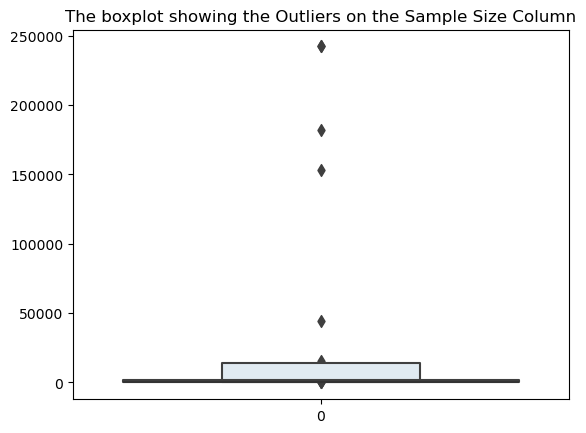

In [20]:
sns.boxenplot(mp['Sample Size'])
plt.title('The boxplot showing the Outliers on the Sample Size Column');

#### Finding the limit using IQR Method

In [21]:
q1=mp['Sample Size'].quantile(0.25)
q3=mp['Sample Size'].quantile(0.75)
iqr=q3-q1

In [22]:
q1,q3,iqr


(24.0, 1946.25, 1922.25)

In [23]:
upper_limit=q3+(0.5*iqr)
lower_limit=q1-(0.5*iqr)
upper_limit, lower_limit

(2907.375, -937.125)

#### finding the outliers

In [24]:
mp_outliers=mp.loc[(mp['Sample Size']> upper_limit)|(mp['Sample Size']< lower_limit)]
mp_outliers

,Addressed Population,Sample Size
3,General population,182004
4,General population,3824
6,Health Care Workers,242278
18,Quarantined population,4850
21,Health care workers,242278
24,Critical Care Units,153033
26,Critical Care Units,6365
29,Critical Care Units,44000
36,Health-care staff and administration,6365
41,Health-care staff and administration,15158


#### Triming the outliers, deleting the outliers

In [25]:
mp_within_range=mp.loc[(mp['Sample Size']< upper_limit)&(mp['Sample Size']> lower_limit)]
mp_within_range

,Addressed Population,Sample Size
0,Homeless,408
1,Homeless,182
2,Health Care Workers,796
5,General population,2
7,General population,36
8,General population,27
9,General population,2251
10,General population,563
11,Quarantined population,29
12,General population,31


In [26]:
mp_within_range.shape

(32, 2)

In [27]:
print(len(mp))
print(len(mp_within_range))
print(len(mp)-len(mp_within_range))

42
32
10


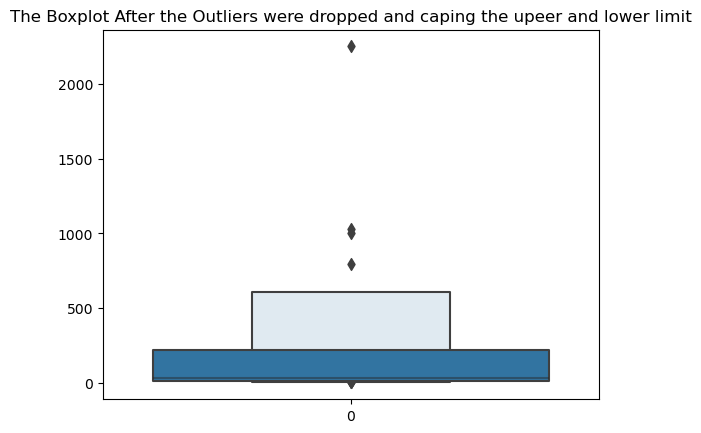

In [28]:
sns.boxenplot(mp_within_range['Sample Size'])
plt.title('The Boxplot After the Outliers were dropped and caping the upeer and lower limit');

## Capping The Outliers
###### Changing the outlier values to upper or lower limit values

In [29]:
mp_within_range=mp.copy()
mp_within_range.loc[mp_within_range['Sample Size']>upper_limit,'Sample Size']=upper_limit
mp_within_range.loc[mp_within_range['Sample Size']<lower_limit,'Sample Size']=lower_limit

In [30]:
mp_within_range

,Addressed Population,Sample Size
0,Homeless,408.000
1,Homeless,182.000
2,Health Care Workers,796.000
3,General population,2907.375
4,General population,2907.375
5,General population,2.000
6,Health Care Workers,2907.375
7,General population,36.000
8,General population,27.000
9,General population,2251.000


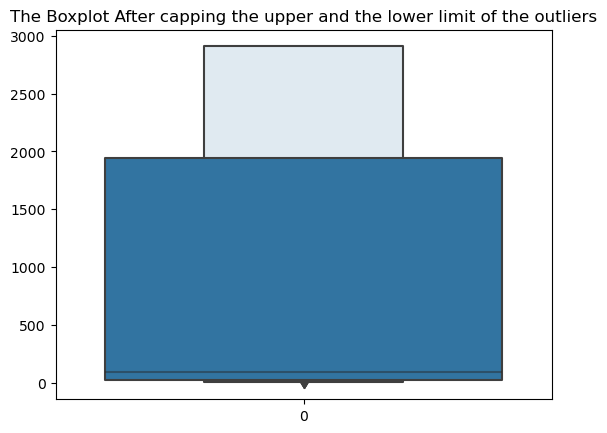

In [31]:
sns.boxenplot(mp_within_range['Sample Size'])
plt.title('The Boxplot After capping the upper and the lower limit of the outliers');

In [32]:
mp_within_range.shape

(42, 2)

##### The dataframe was exported as a csv file and imported as table to Mysql workbench as 'mp_within_range'

In [211]:
#! pip install pymysql
#! pip install ipython-sql
#! pip install mysqlclient

In [34]:
#path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\mp_within_range.csv'
#mp_within_range.to_csv(path)

In [35]:
dbcon=pymysql.connect(host='localhost', user='root',passwd='Mysql@01',database='3mtt_capstone')

#### Reading sql query that manipulated the Adressed_population and Total Sample Size columns

In [36]:
mp_within_range=pd.read_sql_query("""select Addressed_Population,sum(Sample_Size) as Total_Saple_Size
from mp_within_range
group by Addressed_Population;""",dbcon,parse_dates=True)
mp_within_range

,Addressed_Population,Total_Saple_Size
0,Homeless,590.000
1,Health Care Workers,6651.750
2,General population,11141.750
3,Quarantined population,3079.375
4,Patients,581.000
5,Critical Care Units,8861.125
6,Sterile services,4.000
7,Trachiostomy staff,70.000
8,Surgical staff,57.000
9,Health-care staff and administration,5830.750


#### The visual representation of the ten most addressed population with their respective sample sizes

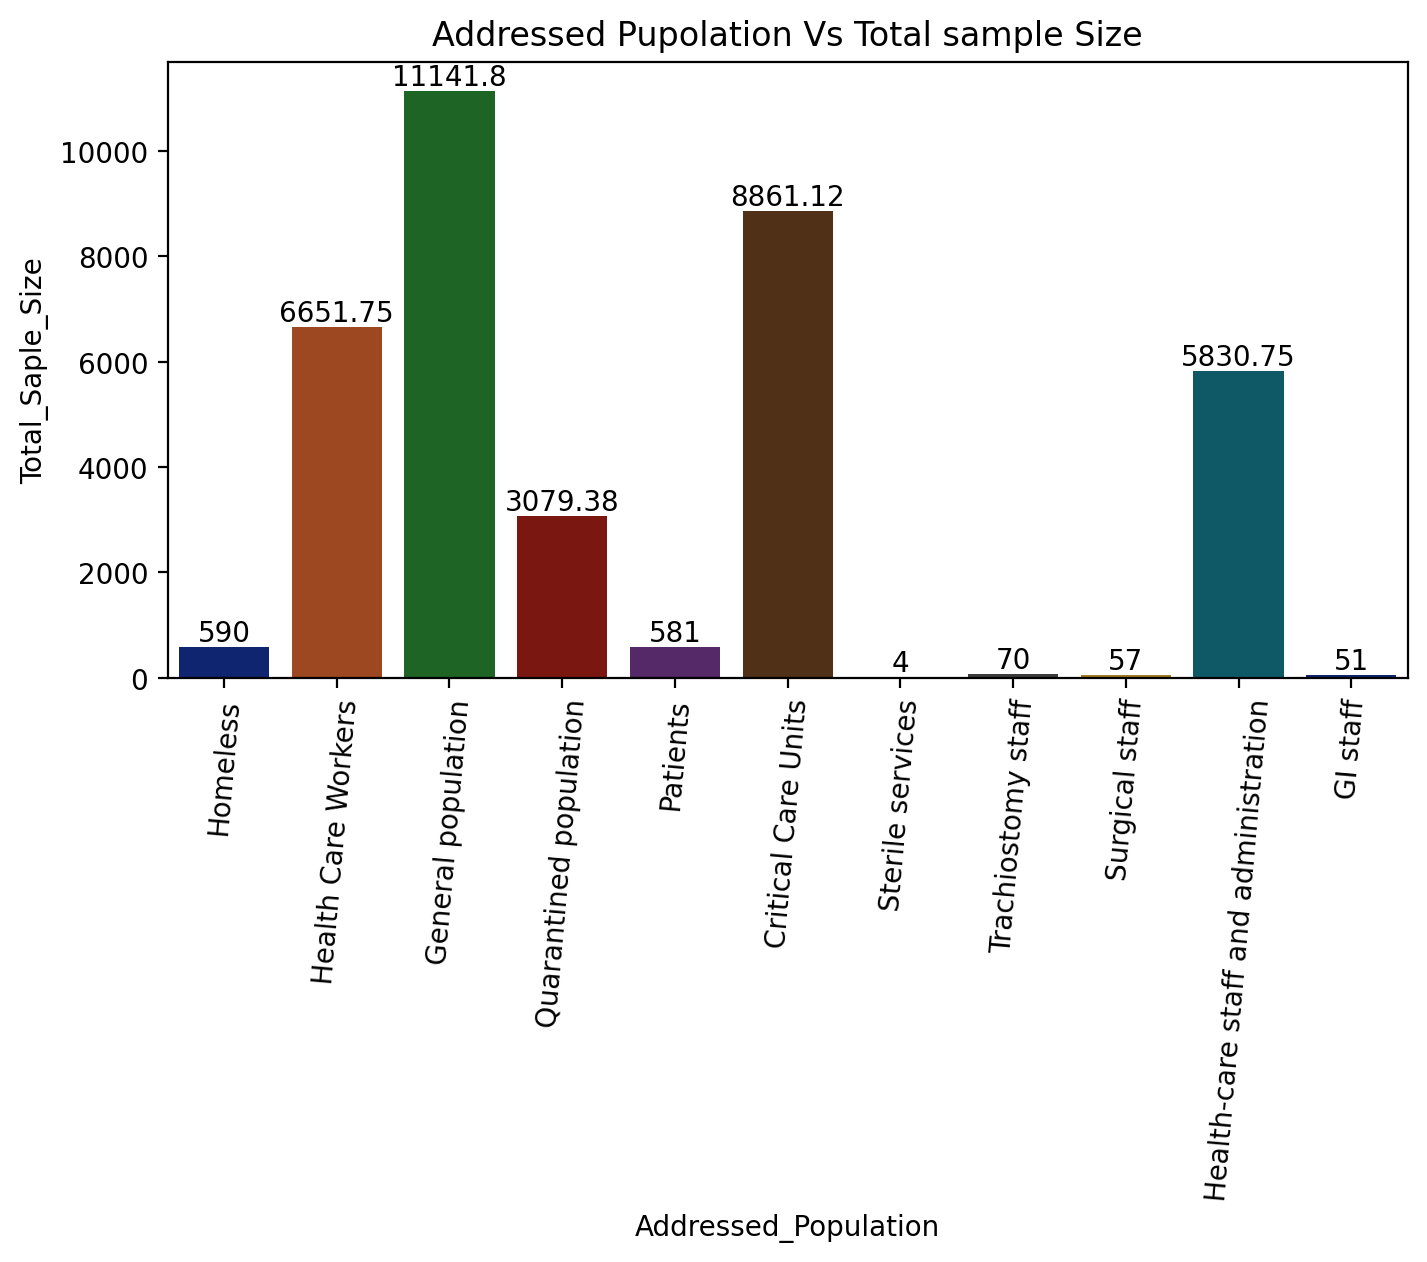

In [37]:
plt.figure(figsize=(8,4), dpi=200)
plt.xticks(rotation=85)
plt.title('Addressed Pupolation Vs Total sample Size')

ax = sns.barplot(x='Addressed_Population', y='Total_Saple_Size', data=mp_within_range,errwidth=0,palette='dark') 
for i in ax.containers:
    ax.bar_label(i,)

In [38]:
dbcon=pymysql.connect(host='localhost', user='root',passwd='Mysql@01',database='3mtt_capstone')

In [39]:
grouped_mp=pd.read_sql_query("""select Addressed_Population,sum(Sample_Size) as Total_Sample_Size
from m_p
group by Addressed_Population;""",dbcon,parse_dates=True)

In [40]:
path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\1. most addresses Population.csv'
most_addressed_pop.to_csv(path)

In [41]:
most_addressed_pop['Addressed Population']=most_addressed_pop['Addressed Population'].\
replace(to_replace='Health care workers',value='Health Care Workers')

In [42]:
most_addressed_pop['Addressed Population']=most_addressed_pop['Addressed Population'].replace(to_replace='Health-care staff',value='Health Care Staff')

#### The visual representation of the value counts of the most addressed population in descending order

General population                      13
Critical Care Units                      7
Health Care Workers                      4
Quarantined population                   3
Trachiostomy staff                       3
Health-care staff and administration     3
Homeless                                 2
Patients                                 2
Surgical staff                           2
GI staff                                 2
Sterile services                         1
Name: Addressed Population, dtype: int64

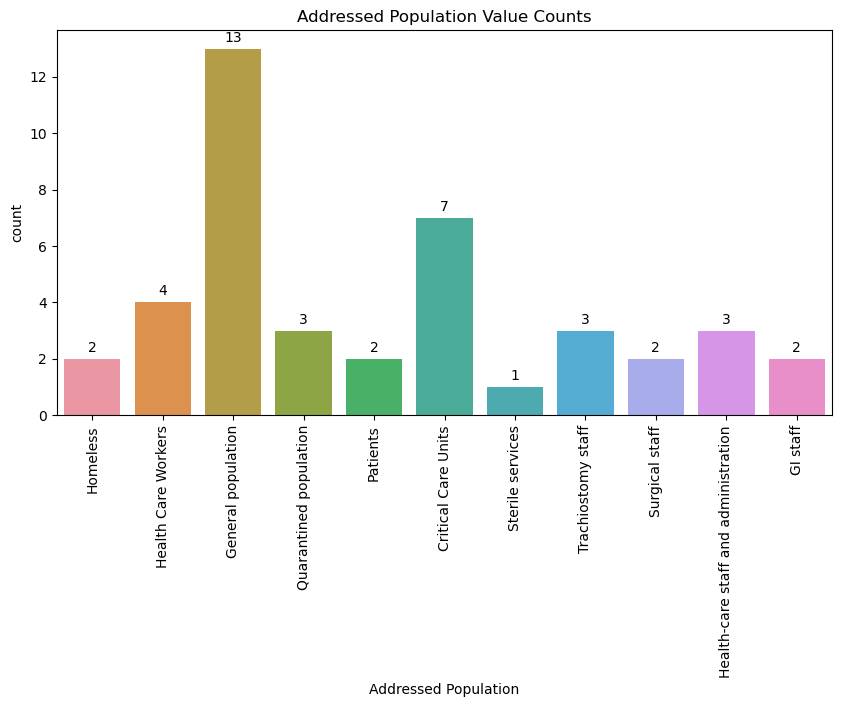

In [43]:
fig,k = plt.subplots(figsize = (10,5))
sns.countplot(most_addressed_pop, x = "Addressed Population", ax = k)
plt.xticks(rotation=90)
plt.title('Addressed Population Value Counts')

for value in k.patches:
    height = value.get_height()
    k.annotate(text = f"{numerize.numerize(height)}", 
               xy = (value.get_x()+value.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               )
most_addressed_pop['Addressed Population'].value_counts().sort_values(ascending=False)

The population folder was import using pandas concat function. Excel was used to extract numners only from the measure of evidence column. the extracted records were assigned a column name "sample size". missing values rows of the sample size column were deleted and the dtype converted to int64. bar chart was used for data visualization. The bar charts above shows the 12 out of 55 most addressed population categories with their corresponding sample sizes.

## Importing the '2_relevant_factors' folder containing eleven csv files as a data frame 'relevant_factors'

Before importing the folder, the following cleaning (renaming some columns) was carried out in excel to make the eleven csv file column names consistent;
1. 'Infuential':'Influential' on 'Evidence that domesticated_farm animals can be infected and maintain transmissibility of the disease.csv' file.
2. 'Date Published':'Date' and 'Influential (Y/N)':'Influential' on 'Methods to understand and regulate the spread in communities.csv' file.
3. 'Date Published':'Date','Factors Described':'Factors' on 'What is the likelihood of significant changes in transmissibility in changing seasons_.csv' file.

#### 2. Ralevant Factors

In [44]:
files=[file for file in os.listdir('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/2_relevant_factors/')]

In [45]:
relevant_factors=pd.DataFrame()
for file in files:
    data=pd.read_csv('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/2_relevant_factors/'+file)
    relevant_factors=pd.concat([relevant_factors,data], ignore_index=True)
    
relevant_factors=relevant_factors.loc[:,~relevant_factors.columns.str.contains('^Unnamed')]
relevant_factors

,Date,Study,Study Link,Journal,Study Type,Factors,Influential,Excerpt,Measure of Evidence,Added on
0,2020-05-16,Optimal policies for control of the novel coro...,https://www.sciencedirect.com/science/article/...,Elsevier,Modeling,"contact rate, quarantine rate, optimal policy",Y,"As well, Fig. 3 shows that the number of quara...",Countries: China; Cities: Wuhan,05/27/2020
1,2020-05-15,"A model for COVID-19 with isolation, quarantin...",https://arxiv.org/pdf/2005.07661v1.pdf,ArXiv,Modeling,"lockdown, social contact restriction",Y,"Comparing these four scenarios, we shall deduc...",Timeline: February 15th - May 6th,05/27/2020
2,2020-05-13,Modeling and forecasting of the COVID-19 pande...,https://arxiv.org/pdf/2005.07071v1.pdf,ArXiv,Modeling,"quarantine, lockdown, social distancing, isola...",Y,Our study reveals that the strict control meas...,Countries: India and seventeen states of India...,05/27/2020
3,2020-05-09,Impacts of social and economic factors on the ...,https://doi.org/10.1007/s00148-020-00778-2,J Popul Econ,Modeling,"public health measures (social distancing, man...",Y,We then compare the transmission rates in diff...,Countries: China; Timeline: January 19 - Febru...,05/31/2020
4,2020-05-08,A multi-region discrete time mathematical mode...,https://doi.org/10.1007/s12190-020-01354-3,J Appl Math Comput,Modeling,"protecting susceptible individuals, preventing...",Y,Figure 10 shows that the number of the exposed...,-,05/28/2020
...,...,...,...,...,...,...,...,...,...,...
542,2020-03-10,High Temperature and High Humidity Reduce the ...,https://dx.doi.org/10.2139/ssrn.3551767,SSRN,Ecological Regression,Humidity,Y,We find the high temperature and relative humi...,countries: China; cities: 100,4/22/2020
543,2020-03-06,"The Effects of ""Fangcang, Huoshenshan, and Lei...",https://doi.org/10.1101/2020.02.26.20028472,medRXIV,Eco-epidemological,Temperature,Y,Mortality of confirmed cases was found to be s...,cities: Wuhan,4/23/2020
544,2020-02-25,Temperature significant change COVID-19 Transm...,https://doi.org/10.1101/2020.02.22.20025791,SSRN,Ecological Regression,Temperature,Y,"Based on our study, it is estimated that when ...",cases: 24139,4/22/2020
545,2020-02-17,The role of absolute humidity on transmission ...,https://doi.org/10.1101/2020.02.12.20022467,medRXIV,Ecological Regression,Temperature,Y,"The regression model, demonstrates that both a...",countries: China; provinces: 26,4/22/2020


In [46]:
relevant_factors.columns

Index(['Date', 'Study', 'Study Link', 'Journal', 'Study Type', 'Factors',
       'Influential', 'Excerpt', 'Measure of Evidence', 'Added on'],
      dtype='object')

In [47]:
relevant_factors['Study Type'].unique()

array(['Modeling', 'Modeling Study', 'Other', 'Case series',
       'Respective Cohort Analysis', 'Expert Review', 'Systematic Review',
       'Serological Survey', 'Case Series', 'Transmission Study',
       'Ecological Regression', 'Simulation', 'Meta-Regression',
       'Systemic Review', 'Retrospective Study', 'Time-series analysis',
       'Ecological Study', 'Literature Review', 'Basic Science',
       'Retrospective Observational', 'Systemic review',
       'Eco-epidemiological Study', 'Eco-Epidemiological',
       'Eco-epidemological'], dtype=object)

In [48]:
relevant_factors['Influential'].unique()

array(['Y', 'N', '-'], dtype=object)

In [49]:
relevant_factors['Influential'].value_counts()

Y    435
N    109
-      3
Name: Influential, dtype: int64

In [50]:
most_influential_factor=relevant_factors[(relevant_factors['Influential']=='Y')|
                                             (relevant_factors['Influential']=='N')]
most_influential_factor

,Date,Study,Study Link,Journal,Study Type,Factors,Influential,Excerpt,Measure of Evidence,Added on
0,2020-05-16,Optimal policies for control of the novel coro...,https://www.sciencedirect.com/science/article/...,Elsevier,Modeling,"contact rate, quarantine rate, optimal policy",Y,"As well, Fig. 3 shows that the number of quara...",Countries: China; Cities: Wuhan,05/27/2020
1,2020-05-15,"A model for COVID-19 with isolation, quarantin...",https://arxiv.org/pdf/2005.07661v1.pdf,ArXiv,Modeling,"lockdown, social contact restriction",Y,"Comparing these four scenarios, we shall deduc...",Timeline: February 15th - May 6th,05/27/2020
2,2020-05-13,Modeling and forecasting of the COVID-19 pande...,https://arxiv.org/pdf/2005.07071v1.pdf,ArXiv,Modeling,"quarantine, lockdown, social distancing, isola...",Y,Our study reveals that the strict control meas...,Countries: India and seventeen states of India...,05/27/2020
3,2020-05-09,Impacts of social and economic factors on the ...,https://doi.org/10.1007/s00148-020-00778-2,J Popul Econ,Modeling,"public health measures (social distancing, man...",Y,We then compare the transmission rates in diff...,Countries: China; Timeline: January 19 - Febru...,05/31/2020
4,2020-05-08,A multi-region discrete time mathematical mode...,https://doi.org/10.1007/s12190-020-01354-3,J Appl Math Comput,Modeling,"protecting susceptible individuals, preventing...",Y,Figure 10 shows that the number of the exposed...,-,05/28/2020
...,...,...,...,...,...,...,...,...,...,...
542,2020-03-10,High Temperature and High Humidity Reduce the ...,https://dx.doi.org/10.2139/ssrn.3551767,SSRN,Ecological Regression,Humidity,Y,We find the high temperature and relative humi...,countries: China; cities: 100,4/22/2020
543,2020-03-06,"The Effects of ""Fangcang, Huoshenshan, and Lei...",https://doi.org/10.1101/2020.02.26.20028472,medRXIV,Eco-epidemological,Temperature,Y,Mortality of confirmed cases was found to be s...,cities: Wuhan,4/23/2020
544,2020-02-25,Temperature significant change COVID-19 Transm...,https://doi.org/10.1101/2020.02.22.20025791,SSRN,Ecological Regression,Temperature,Y,"Based on our study, it is estimated that when ...",cases: 24139,4/22/2020
545,2020-02-17,The role of absolute humidity on transmission ...,https://doi.org/10.1101/2020.02.12.20022467,medRXIV,Ecological Regression,Temperature,Y,"The regression model, demonstrates that both a...",countries: China; provinces: 26,4/22/2020


#### The visual representation of the value counts of the influential factors and their respective percentages on the pie chat

Y    435
N    109
Name: Influential, dtype: int64

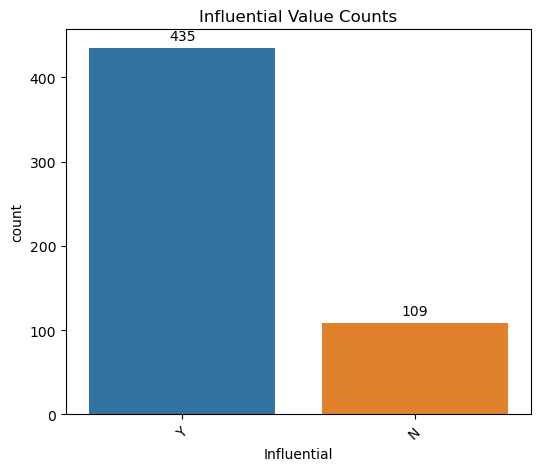

In [51]:
fig,k = plt.subplots(figsize = (6,5))
sns.countplot(most_influential_factor, x = "Influential", ax = k)
plt.xticks(rotation=45)
plt.title('Influential Value Counts')

for value in k.patches:
    height = value.get_height()
    k.annotate(text = f"{numerize.numerize(height)}", 
               xy = (value.get_x()+value.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               );
most_influential_factor['Influential'].value_counts().sort_values(ascending=False)

the bar chat show that influential (Y=435) factors are greater that the non-influential (N=109) factors

In [52]:
most_influential_factor.shape

(544, 10)

In [53]:
# A function to calculate the numeric values and their equivalent percentage values to pie charts

total_rows=544 
def pie_percentage(nums):
  
    return '{:.1f}%\n{:.0f}'.format(nums,total_rows*nums/100)

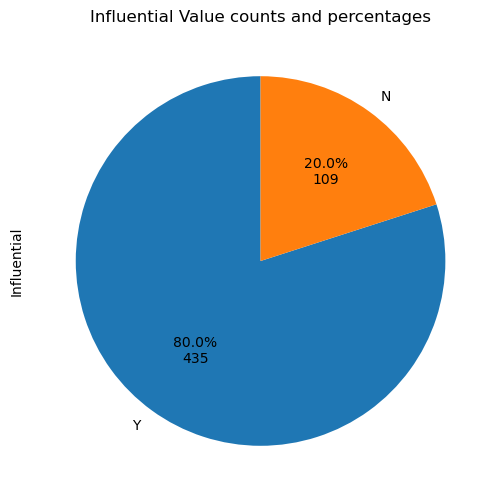

In [54]:
most_influential_factor['Influential'].value_counts().plot(kind='pie',autopct=pie_percentage,
colors=None, startangle=90,figsize=(10, 6));
plt.title('Influential Value counts and percentages');

#### A heatmap to indicate the ratio of the influential factors relative to Study Type column

In [55]:
most_influential_factor.groupby('Study Type')['Influential'].value_counts().sort_values(ascending=False)\
.unstack().style.background_gradient(cmap='plasma')


Influential,N,Y
Study Type,,
Basic Science,nan,1.000000
Case Series,2.000000,nan
Case series,nan,1.000000
Eco-Epidemiological,1.000000,2.000000
Eco-epidemiological Study,2.000000,2.000000
Eco-epidemological,nan,1.000000
Ecological Regression,32.000000,105.000000
Ecological Study,2.000000,1.000000
Expert Review,8.000000,16.000000


## Importing the '3_patient_descriptions folder containing eight csv files as a data frame 'patient_descriptions'

Before importing the folder, the following cleaning (renaming some columns) was carried out in excel to make the eight csv file column names consistent;
1. 'Sample obtained':'Sample Obtained' on How does viral load relate to disease presentations and likelihood of a positive diagnostic test_.csv' file.
2. 'Sample obtained':'Sample Obtained' on 'Proportion of pediatric COVID19 patients who were asymptomatic.csv' file.
3. 'Sample obtained':'Sample Obtained' on 'What is the incubation period of the virus_.csv' file.

#### 3.Patient Descriptions

In [56]:
files=[file for file in os.listdir('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/3_patient_descriptions/')]

In [57]:
patient_descriptions=pd.DataFrame()
for file in files:
    data=pd.read_csv('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/3_patient_descriptions/'+file)
    patient_descriptions=pd.concat([patient_descriptions,data], ignore_index=True)
    
patient_descriptions=patient_descriptions.loc[:,~patient_descriptions.columns.str.contains('^Unnamed')]
patient_descriptions

,Date,Study,Study Link,Journal,Study Type,Sample Size,Age,Sample Obtained,Asymptomatic Transmission,Characteristic Related to Question 2,...,Added On,Sample obtained,Asymptomatic,Specific Sampled Viral load correlated to postive test,Added on,Days,Range (Days),Manifestation,Frequency of Symptoms,Aymptomatic
0,2020-04-10,Presymptomatic Transmission of SARS-CoV-2 — Si...,http://dx.doi.org/10.15585/mmwr.mm6914e1,CDC: Morbidity and Mortality Weekly Report,Retrospective Observational Study,157.0,-,-,0.0640,-,...,2020-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-26,Modes of contact and risk of transmission in C...,https://doi.org/10.1101/2020.03.24.20042606,medRxiv,Prospective Observational Study,305.0,-,Throat,0.0033,-,...,2020-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-15,Temporal dynamics in viral shedding and transm...,https://doi.org/10.1038/s41591-020-0869-5,Nature Medicine,Cross Sectional Study,154.0,Range: 3(mo)-89,-,0.4400,-,...,2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-15,Epidemiological characteristics of 2019 novel ...,https://doi.org/10.3760/cma.j.cn112150-2020022...,Chinese Journal of Preventative Medicine,Cross Sectional Study,391.0,-,-,0.4300,-,...,2020-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-14,Epidemiological parameters of coronavirus dise...,https://doi.org/10.1101/2020.03.21.20040329,medRxiv,Cross Sectional Study,233.0,mean: 46; range: 5 days-90,-,0.4400,-,...,2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2020-02-21,A familial cluster of pneumonia associated wit...,https://doi.org/10.1016/s0140-6736%2820%2930154-9,The Lancet,Prospective cohort,7,range: 10-66,NaN,NaN,NaN,...,NaN,-,NaN,NaN,NaN,-,range: 3-6,NaN,NaN,NaN
218,2020-02-18,Incubation Period and Other Epidemiological Ch...,https://doi.org/10.3390/jcm9020538,medRxiv,Case series,"158, includes 106 Wuhan residents",-,NaN,NaN,NaN,...,NaN,-,NaN,NaN,NaN,"mean: 5.6; 95% CI: 5.0, 6.3",range: 2-14,NaN,NaN,NaN
219,2020-02-16,Early Epidemiological and Clinical Characteris...,https://doi.org/10.24171/j.phrp.2020.11.1.03,Osong Public Health and Research Perspectives,Case series,9,mean: 42.6; range: 20-73,NaN,NaN,NaN,...,NaN,-,NaN,NaN,NaN,mean: 4.1,range: 2-9,NaN,NaN,NaN
220,2020-02-06,The incubation period of 2019-nCoV infections ...,https://doi.org/10.2807/1560-7917.ES.2020.25.5...,Eurosurveillance,Case series,88,range: 2-72,NaN,NaN,NaN,...,NaN,-,NaN,NaN,NaN,"mean: 6.4; 95% CI: 5.6, 7.7",middle 95%: 2.1-11.1,NaN,NaN,NaN


In [58]:
patient_descriptions.columns

Index(['Date', 'Study', 'Study Link', 'Journal', 'Study Type', 'Sample Size',
       'Age', 'Sample Obtained', 'Asymptomatic Transmission',
       'Characteristic Related to Question 2', 'Excerpt', 'Added On',
       'Sample obtained', 'Asymptomatic',
       'Specific Sampled Viral load correlated to postive test', 'Added on',
       'Days', 'Range (Days)', 'Manifestation', 'Frequency of Symptoms',
       'Aymptomatic'],
      dtype='object')

In [59]:
patient_descriptions['Characteristic Related to Question 2'].unique()

array(['-', nan], dtype=object)

### Sample Obtained and Sample size

In [60]:
sso=patient_descriptions[['Sample Size','Sample Obtained','Sample obtained']]
sso

,Sample Size,Sample Obtained,Sample obtained
0,157.0,-,NaN
1,305.0,Throat,NaN
2,154.0,-,NaN
3,391.0,-,NaN
4,233.0,-,NaN
...,...,...,...
217,7,NaN,-
218,"158, includes 106 Wuhan residents",NaN,-
219,9,NaN,-
220,88,NaN,-


#### Finding the duplicate values

In [61]:
sso.loc[sso.duplicated()]

,Sample Size,Sample Obtained,Sample obtained
27,1.0,NaN,Urine
39,23.0,NaN,Urine
40,23.0,NaN,Posterior oropharyngeal saliva
41,23.0,NaN,Rectal
44,136,-,NaN
48,67,-,NaN
49,67,-,NaN
50,67,-,NaN
52,2015,-,NaN
56,59,-,NaN


#### Dropping the Duplicate values

In [62]:
sso=sso.drop_duplicates()
sso

,Sample Size,Sample Obtained,Sample obtained
0,157.0,-,NaN
1,305.0,Throat,NaN
2,154.0,-,NaN
3,391.0,-,NaN
4,233.0,-,NaN
...,...,...,...
216,37,NaN,-
218,"158, includes 106 Wuhan residents",NaN,-
219,9,NaN,-
220,88,NaN,-


In [63]:
sso=sso[sso['Sample Obtained']!='-']

In [64]:
#sso=sso[sso['Sample obtained']!='-']

In [65]:
Sample_Obtained=sso[sso['Sample Obtained'].notna()] #dropping 'na' records in Sample Size column


Sample_Obtained=Sample_Obtained[['Sample Size','Sample Obtained']]#selecting Sample Size and 
                                                                    #Sample Obtaine columns

Sample_Obtained=Sample_Obtained.reset_index(drop=True)

Sample_Obtained=Sample_Obtained.drop(Sample_Obtained.index[[2,3,4,6,12,13,14,15,16,17,21,24]]).reset_index(drop=True)


Sample_Obtained

,Sample Size,Sample Obtained
0,305.0,Throat
1,147,Respiratory tract
2,280,Respiratory tract
3,50,Respiratory tract
4,50,GI tract
5,67,Nasopharyngeal
6,67,Sputum
7,67,Fecal matter
8,74,Respiratory tract
9,74,Fecal matter


In [66]:
Sample_Obtained.shape

(53, 2)

In [67]:
Sample_Obtained.dtypes

Sample Size        object
Sample Obtained    object
dtype: object

In [68]:
Sample_Obtained['Sample Size']=Sample_Obtained['Sample Size'].astype('int64')


In [69]:
#path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\Sample_Obtained1.csv'
#Sample_Obtained.to_csv(path)

In [70]:
dbcon=pymysql.connect(host='localhost', user='root',passwd='Mysql@01',database='3mtt_capstone')

In [71]:
dbcon

In [72]:
Sample_Obtained=pd.read_sql_query("""select Sample_Obtained , sum(sample_Size) as Total_sample_size
from sample_obtained1
group by Sample_obtained;""",dbcon,parse_dates=True)
Sample_Obtained

,Sample_Obtained,Total_sample_size
0,Throat,2647.0
1,Respiratory tract,551.0
2,GI tract,50.0
3,Nasopharyngeal,1923.0
4,Sputum,67.0
5,Fecal matter,141.0
6,Nasopharyngeal; Conjunctival,38.0
7,Throat swab,44805.0
8,Respiratory; Fecal,59.0
9,Nasopharyngeal; Fecal; Anal,84.0


In [73]:
Sample_Obtained.shape

(23, 2)

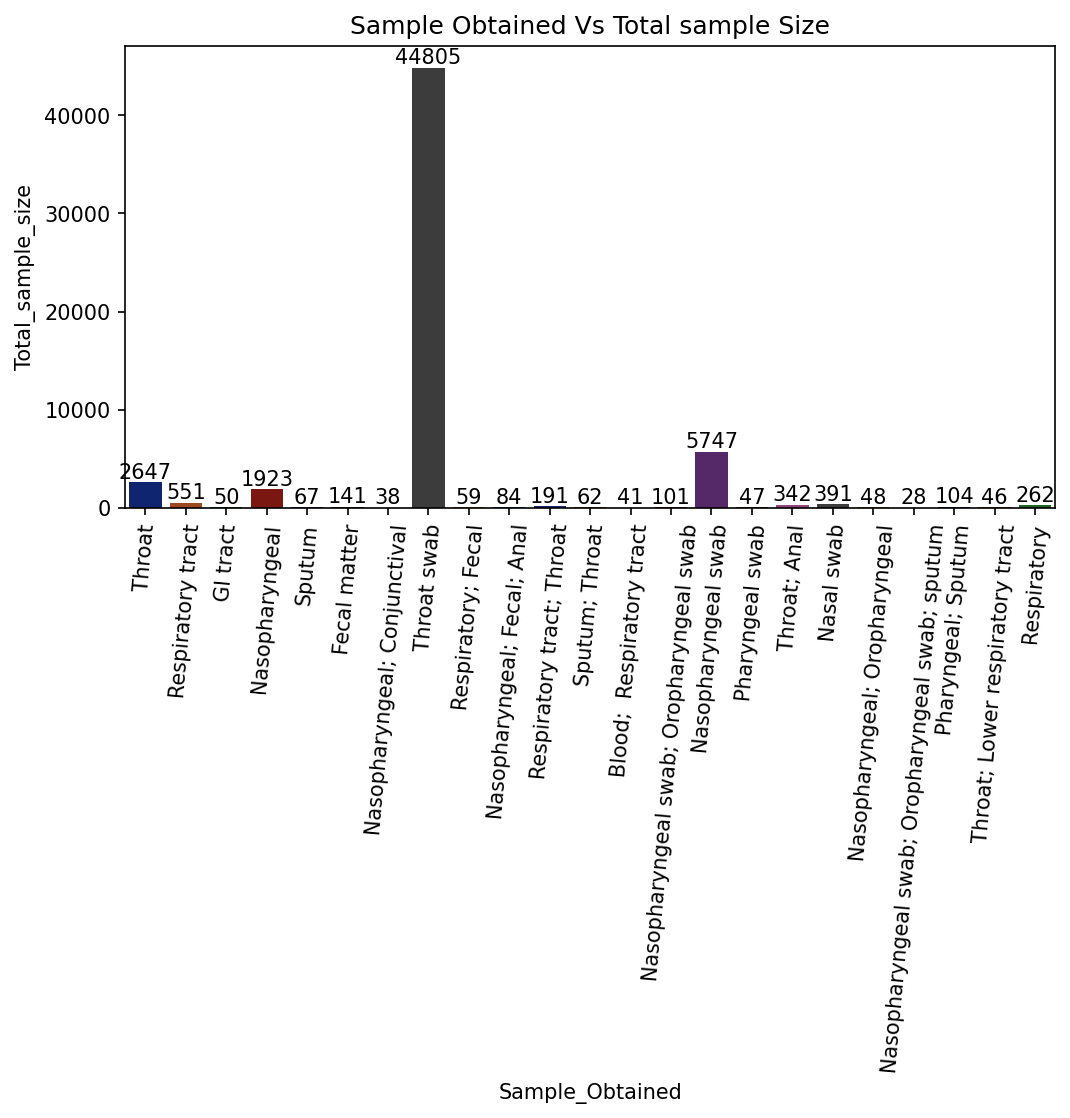

In [74]:
plt.figure(figsize=(8,4), dpi=150)
plt.xticks(rotation=85)
plt.title('Sample Obtained Vs Total sample Size')

ax = sns.barplot(x='Sample_Obtained', y='Total_sample_size', data=Sample_Obtained,errwidth=0,palette='dark') 
for i in ax.containers:
    ax.bar_label(i,)

In [75]:
Sample_obtained=sso[sso['Sample obtained'].notna()] #dropping 'na' record in Sample Size column

Sample_obtained=Sample_obtained[['Sample Size','Sample obtained']]  #selecting Sample Size and 
                                                                    #sample obtaine columns
    
Sample_obtained=Sample_obtained[Sample_obtained['Sample obtained']!='-']  # dropping 'na' record 
                                                                          # in Sample Size column

Sample_obtained.reset_index(drop=True, inplace=True) # reseting the index column
    
Sample_obtained

,Sample Size,Sample obtained
0,23.0,Serum
1,23.0,Urine
2,23.0,Posterior oropharyngeal saliva
3,23.0,Rectal
4,5.0,Nasopharyngeal
5,5.0,Plasma
6,5.0,Urine
7,5.0,Stool
8,323.0,Lower respirratory tract
9,323.0,Nasal


In [76]:
Sample_obtained.shape

(42, 2)

In [77]:
Sample_obtained.dtypes

Sample Size        object
Sample obtained    object
dtype: object

In [78]:
Sample_obtained['Sample Size']=Sample_obtained['Sample Size'].astype('int64')

In [79]:
#path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\Sample_obtained2.csv'
#Sample_obtained.to_csv(path)

In [80]:
Sample_obtained=pd.read_sql_query("""select Sample_obtained, sum(Sample_Size) as Total_sample_size
from sample_obtained2
group by Sample_obtained;""",dbcon,parse_dates=True)
Sample_obtained

,Sample_obtained,Total_sample_size
0,Serum,71.0
1,Urine,359.0
2,Posterior oropharyngeal saliva,23.0
3,Rectal,24.0
4,Nasopharyngeal,148.0
5,Plasma,5.0
6,Stool,13.0
7,Lower respirratory tract,323.0
8,Nasal,340.0
9,Throat,532.0


Total Saple Size Per Sample_obtained


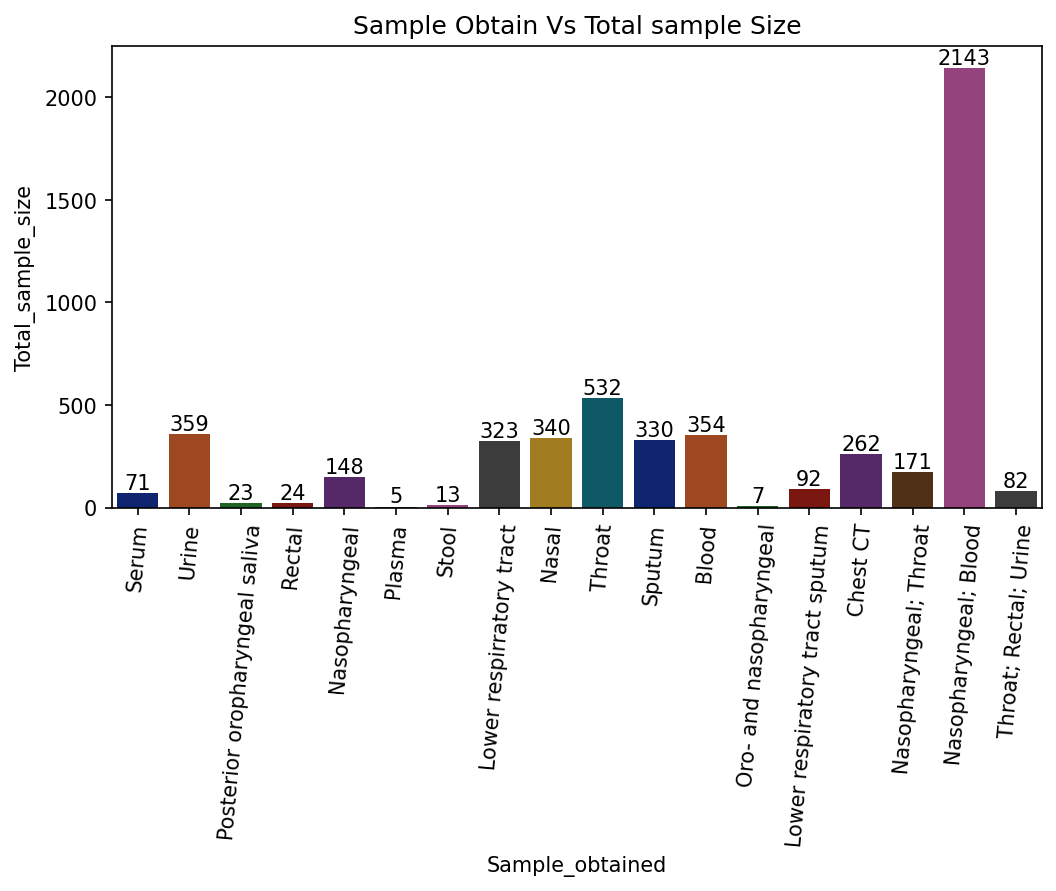

In [81]:
plt.figure(figsize=(8,4), dpi=150)
plt.xticks(rotation=85)
plt.title('Sample Obtain Vs Total sample Size')

ax = sns.barplot(x='Sample_obtained', y='Total_sample_size', data=Sample_obtained,errwidth=0,palette='dark') 
for i in ax.containers:
    ax.bar_label(i,)
print('Total Saple Size Per Sample_obtained')

## Importing the '4_models_and_open_questions' folder containing eight csv files as a data frame 'models_and_open_questions'

#### 4. Models and Open Questions

In [82]:
files=[file for file in os.listdir('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/4_models_and_open_questions/')]

In [83]:
models_and_open_questions=pd.DataFrame()
for file in files:
    data=pd.read_csv('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/4_models_and_open_questions/'+file)
    models_and_open_questions=pd.concat([models_and_open_questions,data], ignore_index=True)
    
models_and_open_questions=models_and_open_questions.loc[:,~models_and_open_questions.columns.str.contains('^Unnamed')]
models_and_open_questions

,Date,Study,Study Link,Journal,Method,Result,Measure of Evidence,Added on,Study Type,Addressed Population,Challenge,Solution,Sample Size,Age,Sample Obtained,Serial Interval (days),Characteristic Related to Question 2,Excerpt
0,2020-05-31,Lymphopenic community acquired pneumonia as si...,https://doi.org/10.1016/j.jinf.2020.02.029,Journal of Infection,-,85% of patients critically ill showed lymphope...,-,4/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-24,Critical role of type III interferon in contro...,https://doi.org/10.1101/2020.04.24.059667,bioxriv,qPCR,human intestinal epithelial cells fully suppor...,patients: 3,5/11/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-17,Distinct early IgA profile may determine sever...,https://doi.org/10.1101/2020.04.14.20059733,medrxiv,Flow cytometry/peptide microarray,"Severe illness correlated with delayed, but br...",patients: 5,4/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-04-17,Single-cell analysis of human lung epithelia r...,https://doi.org/10.1101/2020.04.16.045617,bioxriv,Single Cell RNA analysis/transcriptome analysis,ACE2-positive AT2 cells that co-express pathog...,patients: 19,4/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-04-07,The phenotypic changes of γδ T cells in COVID-...,https://doi.org/10.1101/2020.04.05.20046433,medrxiv,Flow Cytometry,increased expression of CD4 in γδ T cells may ...,patients: 56,4/8/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020-03-12,Discovery of a 382-nt deletion during the earl...,https://doi.org/10.1101/2020.03.11.987222,bioRxiv,qPCR/Genomic Analysis,382-nt deletion covering almost the entire ope...,patients: 8,05-10-2020,Genomic Study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,2020-03-02,"Mutations, Recombination and Insertion in the ...",https://www.biorxiv.org/content/10.1101/2020.0...,bioRxiv,Phylogenetic analysis,The 2019-nCoV stains we have analyzed fall int...,120 genomic sequences,05-24-2020,Genomic Study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,2020-03-02,Comparative genomic analysis revealed specific...,https://www.biorxiv.org/content/10.1101/2020.0...,bioRxiv,Genomic Analysis,Among 98 nucleotide mutations at 93 sites of t...,Twenty-one closely related coronavirus complet...,05-24-2020,Genomic Study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,2020-02-27,Epitope-based peptide vaccine design and targe...,https://www.biorxiv.org/content/10.1101/2020.0...,bioRxiv,IEDB (Immune-Epitope-Database And Analysis-Res...,All selected Band T- cell (MHC class-I and II)...,134 SARS-CoV-2 virus strain sequences are docu...,05-24-2020,Genomic Study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The addressed population from the dataset

In [84]:
models_and_open_questions.columns

Index(['Date', 'Study', 'Study Link', 'Journal', 'Method', 'Result',
       'Measure of Evidence', 'Added on', 'Study Type', 'Addressed Population',
       'Challenge', 'Solution', 'Sample Size', 'Age', 'Sample Obtained',
       'Serial Interval (days)', 'Characteristic Related to Question 2',
       'Excerpt'],
      dtype='object')

In [85]:
models_and_open_questions['Addressed Population'].unique()

array([nan, 'University students', 'Medical center visitors',
       'Quarantined population', 'Public', 'General population',
       'public health policy-makers', 'Researchers/scientists',
       'mobile health providers', 'Policymakers', 'Unemployed population',
       'Developers', 'Disadvantaged groups',
       'Royal Flying Doctor Service', 'Health-care workers',
       'Air travelers', 'Diabetics', 'Children and Adolescents',
       'General public', 'Medical students', 'Elderly population'],
      dtype=object)

In [86]:
Addressed_Population=models_and_open_questions[['Addressed Population']] #extracting the addressed
                                    # population column from 'models_and_open_questions' dataframe
Addressed_Population=Addressed_Population[['Addressed Population']].dropna()#dropping the 'na' 
                                                    #records from the addressed population columns
Addressed_Population

,Addressed Population
7,University students
8,Medical center visitors
9,Quarantined population
10,Public
11,General population
...,...
71,General population
72,General population
73,General population
74,General population


In [87]:
top6_ap=Addressed_Population.value_counts().nlargest(6) #Top six most addressed population
top6_ap

Addressed Population    
General population          39
Children and Adolescents     5
Health-care workers          4
Researchers/scientists       4
General public               2
Air travelers                1
dtype: int64

General population          39
Children and Adolescents     5
Researchers/scientists       4
Health-care workers          4
General public               2
Medical center visitors      1
Name: Addressed Population, dtype: int64

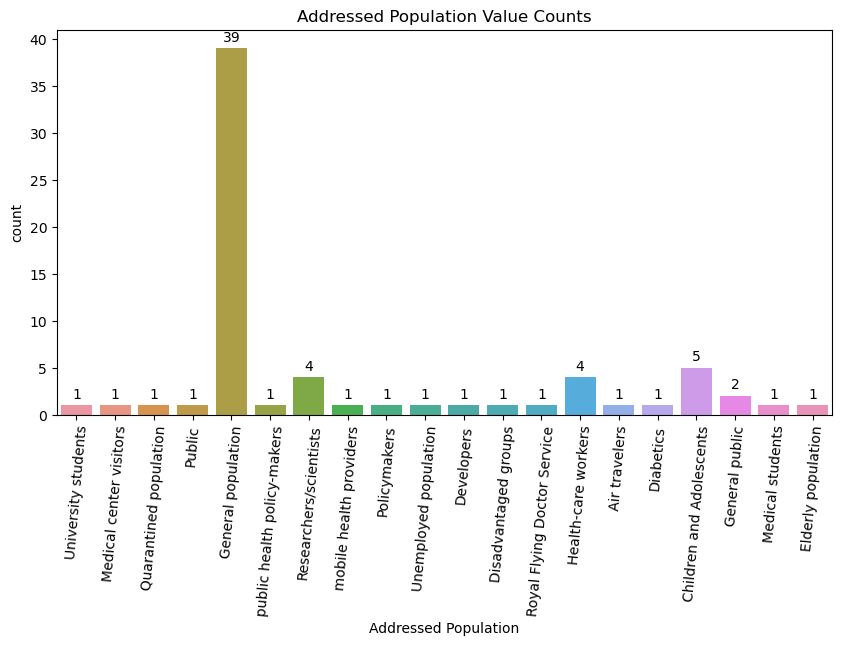

In [88]:
fig,k = plt.subplots(figsize = (10,5))
sns.countplot(Addressed_Population, x = "Addressed Population", ax = k)
plt.xticks(rotation=85)
plt.title('Addressed Population Value Counts')

for value in k.patches:
    height = value.get_height()
    k.annotate(text = f"{numerize.numerize(height)}", 
               xy = (value.get_x()+value.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               );
Addressed_Population['Addressed Population'].value_counts().sort_values(ascending=False).nlargest(6)

From the population dataset and the model and the open question dataset, the visualizations show that General population indicate a pattern of been the most daddresed population.

#### Sample Obtained data cleaning

In [89]:
models_and_open_questions.columns

Index(['Date', 'Study', 'Study Link', 'Journal', 'Method', 'Result',
       'Measure of Evidence', 'Added on', 'Study Type', 'Addressed Population',
       'Challenge', 'Solution', 'Sample Size', 'Age', 'Sample Obtained',
       'Serial Interval (days)', 'Characteristic Related to Question 2',
       'Excerpt'],
      dtype='object')

In [90]:
Sample_Obtained=models_and_open_questions[['Sample Obtained']] #extracting the addressed
                                    # population column from 'models_and_open_questions' dataframe
Sample_Obtained=models_and_open_questions[['Sample Obtained']].dropna()#dropping the 'na' 
                                                    #records from the addressed population columns
    
Sample_Obtained=Sample_Obtained[Sample_Obtained['Sample Obtained']!='-']# dropping the '-' records
                                                    # from 'Sample Obtained column'
    
Sample_Obtained.reset_index(drop=True,inplace=True)

Sample_Obtained

,Sample Obtained
0,Respiratory; Blood
1,Nasal
2,Respiratory
3,Sputum; Blood; broncho-alveolar lavage; Nasoph...
4,Respiratory; Throat
5,Respiratory
6,Nasal


In [91]:
models_and_open_questions['Characteristic Related to Question 2'].unique()

array([nan, '-'], dtype=object)

## Importing the '5_materials' folder containing nine csv files as a data frame 'Materials'

#### 5. Materials

In [92]:
files=[file for file in os.listdir('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/5_materials/')]

In [93]:
materials=pd.DataFrame()
for file in files:
    data=pd.read_csv('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/5_materials/'+file)
    materials=pd.concat([materials,data], ignore_index=True)
    
materials=materials.loc[:,~materials.columns.str.contains('^Unnamed')]
materials.head(3)

,Date,Study,Study Link,Journal,Study Type,Material,Method,Virus Titer at End of Experiment,Surface Type,Conclusion,...,Effective Concentration/dosage,Viral Titer,Persistence,TCID50,Half-life,Intended use,Concentration/Dose,Exposure time,Days After Onset/Admission (+) Covid-19 Presence (maximum unless otherwise stated),Property 2
0,2020-05-06,Review Article,https://doi.org/10.1016/j.jceh.2020.04.020,JOURNAL OFCLINICALANDEXPERIMENTAL HEPATOLOGY,Sustainability of Coronavirus on Different Sur...,Plastic,-,103.7 to 100.6 TCID50 72 h,Hydrophobic,Coronavirus can sustain for a long time on var...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-06,Review Article,https://doi.org/10.1016/j.jceh.2020.04.020,JOURNAL OFCLINICALANDEXPERIMENTAL HEPATOLOGY,Sustainability of Coronavirus on Different Sur...,Stainless Steel,-,103.7 to 100.6 TCID50 48 h,Hydrophobic,Coronavirus can sustain for a long time on var...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-06,Review Article,https://doi.org/10.1016/j.jceh.2020.04.020,JOURNAL OFCLINICALANDEXPERIMENTAL HEPATOLOGY,Sustainability of Coronavirus on Different Sur...,Copper,-,no viability 4 h,Hydrophobic,Coronavirus can sustain for a long time on var...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
materials.columns

Index(['Date', 'Study', 'Study Link', 'Journal', 'Study Type', 'Material',
       'Method', 'Virus Titer at End of Experiment', 'Surface Type',
       'Conclusion', 'Measure of Evidence', 'Added on', 'Effective Against',
       'Effective Concentration/dosage', 'Viral Titer', 'Persistence',
       'TCID50', 'Half-life', 'Intended use', 'Concentration/Dose',
       'Exposure time',
       'Days After Onset/Admission (+) Covid-19 Presence (maximum unless otherwise stated)',
       'Property 2'],
      dtype='object')

## Importing the '6_diagnostics' folder containing three csv files as a data frame 'diagnostics'

#### 6. Diagnostics

In [95]:
files=[file for file in os.listdir('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/6_diagnostics/')]

In [96]:
diagnostics=pd.DataFrame()
for file in files:
    data=pd.read_csv('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/6_diagnostics/'+file)
    diagnostics=pd.concat([diagnostics,data], ignore_index=True)
    
diagnostics=diagnostics.loc[:,~diagnostics.columns.str.contains('^Unnamed')]
diagnostics.head(3)

,Date,Study,Study Link,Journal,Detection Method,Sample Size,Measure of Testing Accuracy,Speed of Assay,FDA Approval,Study Type,Added on,Speed of assay,FDA approval (Y/N)
0,4/23/2020,Comparison of Abbott ID Now and Abbott m2000 m...,https://jcm.asm.org/content/jcm/early/2020/04/...,American Society for Microbiology,Isothermal amplification,524,positive agreement: 75%; negative agreement: 99%,5-13 mins,-,Clinical trial,4/25/2020,NaN,NaN
1,4/17/2020,The Detection of SARS-CoV-2 using the Cepheid ...,https://jcm.asm.org/content/jcm/early/2020/04/...,Journal of Clinical Microbiology,Roche cobas SARS-CoV-2 assay,103,-,3 hr 45 min,Y,Clinical Study,4/23/2020,NaN,NaN
2,04/17//2020,RAPID SEROLOGICAL TESTS HAVE A ROLE IN ASYMPTO...,https://www.medrxiv.org/content/10.1101/2020.0...,medRxiv,rapid serological test Viva-Diag analyzingCOVI...,512,-,15 mins,Y,Clinical Trial,5/9/2020,NaN,NaN


In [97]:
diagnostics.columns

Index(['Date', 'Study', 'Study Link', 'Journal', 'Detection Method',
       'Sample Size', 'Measure of Testing Accuracy', 'Speed of Assay',
       'FDA Approval', 'Study Type', 'Added on', 'Speed of assay',
       'FDA approval (Y/N)'],
      dtype='object')

#### Explatory data analysis on the 'sample size' and 'FDA Approval' columns

In [98]:
fda_sample_size=diagnostics[['FDA Approval','Sample Size']]
fda_sample_size

,FDA Approval,Sample Size
0,-,524
1,Y,103
2,Y,512
3,Y,103
4,N,99
...,...,...
160,NaN,426
161,NaN,-
162,NaN,136 studies
163,NaN,524 (paired)


In [99]:
fda_sample_size=diagnostics[['FDA Approval','Sample Size']] # selecting the 'FDA Approval', and 'Sample Size'
                                                #from the dataframe
    
fda_sample_size=diagnostics[['FDA Approval','Sample Size']].dropna() # dropping the 'na' records from the dataframe


fda_sample_size.reset_index(drop=True,inplace=True) # reseting the index column


sfda=fda_sample_size.drop(fda_sample_size.index[[0,5,7,8,9,15,18,19,22,23,24,30,31,32,33,36,40,41,42,
                           43,44,51,52,53,56,57,58,59]]).reset_index(drop=True)# dropping 
                                                            #the undesirable records by their index
fda_sample_size

,FDA Approval,Sample Size
0,-,524
1,Y,103
2,Y,512
3,Y,103
4,N,99
...,...,...
61,Y,284
62,Y,284
63,N,2
64,Y,297


In [100]:
fda_sample_size['FDA Approval'].unique()

array(['-', 'Y', 'N'], dtype=object)

In [101]:
fda_sample_size=fda_sample_size.drop(fda_sample_size.index[[0,5,7,8,9,15,18,19,22,23,24,30,31,32,33,36,40,41,42,43,44,51,52,53,56,57,58,59]]).reset_index(drop=True)
fda_sample_size

,FDA Approval,Sample Size
0,Y,103
1,Y,512
2,Y,103
3,N,99
4,N,3
5,Y,1014
6,Y,426
7,Y,426
8,Y,426
9,Y,194


In [102]:
fda_sample_size.shape

(38, 2)

In [103]:
fda_sample_size['FDA Approval'].unique()

array(['Y', 'N'], dtype=object)

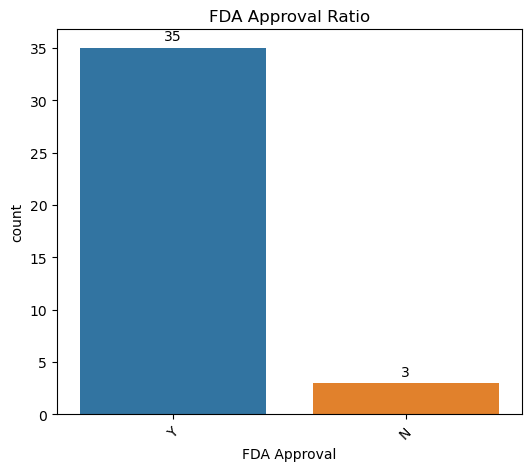

In [104]:
fig,k = plt.subplots(figsize = (6,5))
sns.countplot(fda_sample_size, x = "FDA Approval", ax = k)
plt.xticks(rotation=45)
plt.title('FDA Approval Ratio')

for value in k.patches:
    height = value.get_height()
    k.annotate(text = f"{numerize.numerize(height)}", 
               xy = (value.get_x()+value.get_width()/2, height), 
               xytext = (0,3), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               );

In [105]:
#path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\fda_sample_size.csv'
#fda_sample_size.to_csv(path)

In [106]:
dbcon=pymysql.connect(host='localhost', user='root',passwd='Mysql@01',database='3mtt_capstone')

In [107]:
dbcon

In [108]:
fda_sample_size=pd.read_sql_query("""select FDA_Approval, sum(Sample_Size) as Total_sample_size
from fda_sample_size
group by FDA_Approval;""",dbcon,parse_dates=True)
fda_sample_size

,FDA_Approval,Total_sample_size
0,Y,9436.0
1,N,104.0


Total Saple Size Per FDA Approval


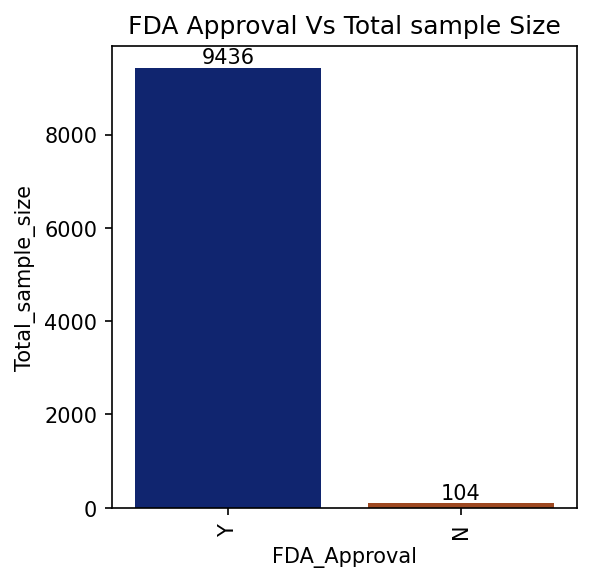

In [109]:
plt.figure(figsize=(4,4), dpi=150)
plt.xticks(rotation=90)
plt.title('FDA Approval Vs Total sample Size')
ax = sns.barplot(x='FDA_Approval', y='Total_sample_size', data=fda_sample_size,errwidth=0,palette='dark') 
for i in ax.containers:
    ax.bar_label(i,)
print('Total Saple Size Per FDA Approval')

## Importing the '7_therapeutics_interventions_and_clinical_studies' folder containing two csv files as a data frame 'therapeutics'

#### 7. Therapeutics_interventions_and_clinical_studies


In [110]:
files=[file for file in os.listdir('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/7_therapeutics_interventions_and_clinical_studies/')]

In [111]:
therapeutics=pd.DataFrame()
for file in files:
    data=pd.read_csv('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/7_therapeutics_interventions_and_clinical_studies/'+file)
    therapeutics=pd.concat([therapeutics,data], ignore_index=True)
    
therapeutics=therapeutics.loc[:,~therapeutics.columns.str.contains('^Unnamed')]
therapeutics.head(3)

,Date,Study,Study Link,Journal,Study Type,Therapeutic method(s) utilized/assessed,Sample Size,Severity of Disease,General Outcome/Conclusion Excerpt,Primary Endpoint(s) of Study,Clinical Improvement (Y/N),Added On
0,2020-05-23,Enhanced platelet inhibition treatment improve...,https://doi.org/10.1016/j.phrs.2020.104950,Pharmacological Research,Cross-sectional study,"25μg/Kg/bodyweight tiroﬁban as bolus infusion,...",10,patients with laboratory conﬁrmed SARS-CoV-2 i...,Treated patients consistently experienced a me...,Co-primary exploratory outcomes were the chang...,Y,6/2/2020
1,2020-05-12,Nifedipine and Amlodipine Are Associated With ...,https://pubmed.ncbi.nlm.nih.gov/32411566/,Cureus,retrospective review,Nifedipine and Amlodipine,77,at or above the age of 65 and that expired or ...,Patients treated with a CCB were significantly...,survival to discharge and progression of disea...,-,5/23/2020
2,2020-05-05,Pulmonary intravascular coagulation in COVID-1...,https://doi.org/10.1007/s11239-020-02129-0,Journal of Thrombosis and Thrombolysis,Expert review,Low molecular weight heparin; Tissue Plasmino...,-,-,LMWH at prophylactic doses should be administe...,-,-,5/12/2020


## Importing the '8_risk_factors' folder containing nine csv files as a data frame 'risk_factors'

## 8. Risk Factors

In [112]:
files=[file for file in os.listdir('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/8_risk_factors/')]

In [113]:
risk_factors=pd.DataFrame()
for file in files:
    data=pd.read_csv('C:/Users/Maliuran/Documents/AXIA HUB/PYTHON/3MTT/3MTT Capstone Extract/Kaggle/target_tables/capstone/8_risk_factors/'+file)
    risk_factors=pd.concat([risk_factors,data], ignore_index=True)
    
risk_factors=risk_factors.loc[:,~risk_factors.columns.str.contains('^Unnamed')]
risk_factors

,Date,Study,Study Link,Journal,Severe,Severe lower bound,Severe upper bound,Severe p-value,Severe Significant,Severe Adjusted,...,Fatality Calculated,Multivariate adjustment,Study Type,Sample Size,Study Population,Added on,Critical only,Discharged vs. death?,Critical only?,Discharge vs. death?
0,2020-05-29,Phenotypic characteristics and prognosis of in...,https://www.ncbi.nlm.nih.gov/pubmed/32472191/,Diabetologia,OR: 1.00,0.99,1.01,NaN,Not Significant,Not Adjusted,...,Extracted,NaN,Retrospective observational study,1317,The CORONADO study was launched in all French ...,NaN,Y,N,NaN,NaN
1,2020-05-28,Obesity and COVID-19: an Italian snapshot,https://www.ncbi.nlm.nih.gov/pubmed/32463545/,Obesity,NaN,NaN,NaN,NaN,NaN,NaN,...,Extracted,NaN,Retrospective observational study,92,92 patients stayed at least one day in the COV...,NaN,N,N,NaN,NaN
2,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,AOR=0.99,0.97,1.02,0.65,Not Significant,Adjusted,...,NaN,Age; Sex,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
3,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,AOR=0.99,0.97,1.02,0.6,Not Significant,Adjusted,...,NaN,Age; Sex; Chest tightness; Diabetes; Lung dise...,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
4,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,AOR=0.99,0.96,1.02,0.55,Not Significant,Adjusted,...,NaN,Age; Sex; Chest tightness; Diabetes; Lung dise...,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2020-03-03,Epidemiological and clinical features of 2019-...,https://doi.org/10.1101/2020.03.01.20029397,medRxiv,OR 14.46,7.03,29.75,<.01,Significant,Not Adjusted,...,NaN,NaN,Retrospective observational study,267,"Qianjiang central hospital of Chongqing, Chong...",NaN,N,N,NaN,NaN
997,2020-03-02,Clinical Characteristics of Patients with Seve...,https://doi.org/10.1101/2020.03.02.20029306,medRxiv,OR 1.00,0.40,2.53,0.99,Not Significant,Not Adjusted,...,NaN,NaN,Cross-sectional study,110,respiratory ICU admissions of Central Hospital...,4/10/2020,N,N,NaN,NaN
998,2020-02-28,Clinical Characteristics of Coronavirus Diseas...,https://www.ncbi.nlm.nih.gov/pubmed/32109013/,New England Journal of Medicine,OR 2.60,1.45,4.66,<0.01,Significant,Not Adjusted,...,NaN,NaN,Retrospective observational study,1099,"552 hospitals in China between Dec 11, 2020 to...",4/10/2020,Y,N,NaN,NaN
999,2020-02-28,Clinical Characteristics of Coronavirus Diseas...,https://www.ncbi.nlm.nih.gov/pubmed/32109013/,New England Journal of Medicine,OR 1.5,0.97,2.36,0.07,Not Significant,Not Adjusted,...,NaN,NaN,Retrospective observational study,1099,"552 hospitals in China between Dec 11, 2020 to...",4/10/2020,N,N,NaN,NaN


In [114]:
risk_factors.columns

Index(['Date', 'Study', 'Study Link', 'Journal', 'Severe',
       'Severe lower bound', 'Severe upper bound', 'Severe p-value',
       'Severe Significant', 'Severe Adjusted', 'Severe Calculated',
       'Fatality', 'Fatality lower bound', 'Fatality upper bound',
       'Fatality p-value', 'Fatality Significant', 'Fatality Adjusted',
       'Fatality Calculated', 'Multivariate adjustment', 'Study Type',
       'Sample Size', 'Study Population', 'Added on', 'Critical only',
       'Discharged vs. death?', 'Critical only?', 'Discharge vs. death?'],
      dtype='object')

In [115]:
#path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\1. Risk Factors.csv'
#risk_factors.to_csv(path)

In [116]:
severity=pd.read_csv('C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\1. Risk_Factors_cleaned.csv')
severity=severity.loc[:,~severity.columns.str.contains('^Unnamed')]
severity

,Date,Study,Study Link,Journal,Severe,Severity,Severe lower bound,Severe upper bound,Severe p-value,Severe Significant,...,Fatality Calculated,Multivariate adjustment,Study Type,Sample Size,Study Population,Added on,Critical only,Discharged vs. death?,Critical only?,Discharge vs. death?
0,2020-05-29,Phenotypic characteristics and prognosis of in...,https://www.ncbi.nlm.nih.gov/pubmed/32472191/,Diabetologia,OR: 1.00,100,0.99,1.01,NaN,Not Significant,...,Extracted,NaN,Retrospective observational study,1317,The CORONADO study was launched in all French ...,NaN,Y,N,NaN,NaN
1,2020-05-28,Obesity and COVID-19: an Italian snapshot,https://www.ncbi.nlm.nih.gov/pubmed/32463545/,Obesity,NaN,#VALUE!,NaN,NaN,NaN,NaN,...,Extracted,NaN,Retrospective observational study,92,92 patients stayed at least one day in the COV...,NaN,N,N,NaN,NaN
2,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,AOR=0.99,99,0.97,1.02,0.65,Not Significant,...,NaN,Age; Sex,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
3,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,AOR=0.99,99,0.97,1.02,0.6,Not Significant,...,NaN,Age; Sex; Chest tightness; Diabetes; Lung dise...,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
4,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,AOR=0.99,99,0.96,1.02,0.55,Not Significant,...,NaN,Age; Sex; Chest tightness; Diabetes; Lung dise...,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2020-03-03,Epidemiological and clinical features of 2019-...,https://doi.org/10.1101/2020.03.01.20029397,medRxiv,OR 14.46,1446,7.03,29.75,<.01,Significant,...,NaN,NaN,Retrospective observational study,267,"Qianjiang central hospital of Chongqing, Chong...",NaN,N,N,NaN,NaN
997,2020-03-02,Clinical Characteristics of Patients with Seve...,https://doi.org/10.1101/2020.03.02.20029306,medRxiv,OR 1.00,100,0.40,2.53,0.99,Not Significant,...,NaN,NaN,Cross-sectional study,110,respiratory ICU admissions of Central Hospital...,4/10/2020,N,N,NaN,NaN
998,2020-02-28,Clinical Characteristics of Coronavirus Diseas...,https://www.ncbi.nlm.nih.gov/pubmed/32109013/,New England Journal of Medicine,OR 2.60,260,1.45,4.66,<0.01,Significant,...,NaN,NaN,Retrospective observational study,1099,"552 hospitals in China between Dec 11, 2020 to...",4/10/2020,Y,N,NaN,NaN
999,2020-02-28,Clinical Characteristics of Coronavirus Diseas...,https://www.ncbi.nlm.nih.gov/pubmed/32109013/,New England Journal of Medicine,OR 1.5,15,0.97,2.36,0.07,Not Significant,...,NaN,NaN,Retrospective observational study,1099,"552 hospitals in China between Dec 11, 2020 to...",4/10/2020,N,N,NaN,NaN


# Severrity and Discharge vs Death

In [117]:
sdd=severity[['Severity','Discharged vs. death?']].dropna()
sdd.rename(columns={'Discharged vs. death?':'DischargedVsDeath','Sample Size':'Sample_Size'},inplace=True)
sdd

,Severity,DischargedVsDeath
0,100,N
1,#VALUE!,N
2,99,N
3,99,N
4,99,N
...,...,...
996,1446,N
997,100,N
998,260,N
999,15,N


In [118]:
sdd=sdd[sdd['Severity']!='#VALUE!']
sdd

,Severity,DischargedVsDeath
0,100,N
2,99,N
3,99,N
4,99,N
5,101,N
...,...,...
996,1446,N
997,100,N
998,260,N
999,15,N


In [119]:
sdd['Severity']=sdd['Severity'].astype('int64')

In [120]:
#path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\1. Risk Factors.csv'
#risk_factors.to_csv(path)

In [121]:
map_dr={'Y':1, 'N':0}

In [122]:
def mapdr(row_no,dic_value):
    return dic_value[row_no]

In [123]:
sdd['DeathRate']=sdd.DischargedVsDeath.apply(mapdr,args=(map_dr,))
sdd

,Severity,DischargedVsDeath,DeathRate
0,100,N,0
2,99,N,0
3,99,N,0
4,99,N,0
5,101,N,0
...,...,...,...
996,1446,N,0
997,100,N,0
998,260,N,0
999,15,N,0


In [124]:
sdd.loc[105]

Severity             24995107579
DischargedVsDeath              N
DeathRate                      0
Name: 105, dtype: object

In [125]:
sdd['Severity'].nlargest()

105    24995107579
325           2396
996           1446
295           1216
25            1189
Name: Severity, dtype: int64

In [126]:
sdd=sdd.drop(sdd.index[[105]]).reset_index(drop=True)
sdd

,Severity,DischargedVsDeath,DeathRate
0,100,N,0
1,99,N,0
2,99,N,0
3,99,N,0
4,101,N,0
...,...,...,...
489,1446,N,0
490,100,N,0
491,260,N,0
492,15,N,0


In [127]:
sdd.loc[105]

Severity             116
DischargedVsDeath      N
DeathRate              0
Name: 105, dtype: object

In [128]:
sdd.dtypes

Severity              int64
DischargedVsDeath    object
DeathRate             int64
dtype: object

In [129]:
sdd[sdd['DischargedVsDeath']=='Y']

,Severity,DischargedVsDeath,DeathRate
5,102,Y,1
6,104,Y,1
86,723,Y,1
122,248,Y,1
196,221,Y,1
271,363,Y,1


In [130]:
sdd[sdd['DischargedVsDeath']=='N']

,Severity,DischargedVsDeath,DeathRate
0,100,N,0
1,99,N,0
2,99,N,0
3,99,N,0
4,101,N,0
...,...,...,...
489,1446,N,0
490,100,N,0
491,260,N,0
492,15,N,0


# XGBoost Model

for the purpose of this model development, two columns ('Severity' and 'Discharged vs. death?') were extracted from the severity dataframe to create a new dataframe 'ssd'. The 'Discharged vs. death?' column was remane to 'DischargedVsDeath' and mapped as 'DeathRate' column with ('Y':1, 'N':0) and added to the ssd dataframe

In [131]:
import sklearn
sklearn.set_config(transform_output='pandas')

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import category_encoders as ce 
import pickle

In [132]:
from sklearn.model_selection import train_test_split

X=sdd.drop(columns='DischargedVsDeath',)
y=sdd['DischargedVsDeath']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=8)

In [133]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
from xgboost import plot_importance

estimators= [
    ('encoder', TargetEncoder()),
    ('clf',XGBClassifier(random_state=8))
]
pipe=Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [134]:
sdd_dummies= pd.get_dummies(sdd,columns=['DischargedVsDeath'])

In [135]:
y=sdd_dummies['DischargedVsDeath_N']
X=sdd_dummies.drop(['DischargedVsDeath_N','DischargedVsDeath_Y'], axis=1)

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [137]:
xgb=XGBClassifier(objective='binary:logistic', random_state=0)

In [138]:
cv_params={'max_dept':[4,6],
          'min_child-weight':[3,5],
          'learning_rate':[0.1,0.2,0.3],
          'n_estimators':[5,10,15],
          'subsample':[0.7],
          'colsample_bytree':[0.9]}

In [139]:
scoring = {'accuracy','precision','recall','f1'}

In [140]:
xgb_cv=GridSearchCV(xgb,cv_params, cv=5,refit='f1')

In [141]:
xgb_cv=xgb_cv.fit(X_train,y_train)
xgb_cv

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.9],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_dept': [4, 6],
                         'min_child-weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1')

In [142]:
y_pred=xgb_cv.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Model Evaluation and Accuracy

In [143]:
# 1. Print the accuracy score.

ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print the precision score.

pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print the recall score.

rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)


# 4. Print the f1 score.

f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9838709677419355
precision score: 0.9838709677419355
recall score: 1.0
f1 score: 0.991869918699187


In [144]:
# XGBosst Model accuracy, Precision, Recall and F1 Score
evaluation_table= pd.DataFrame({'Model': ['Tuned XGBoost'],
         'Accuracy': [0.9838709677419355],
         'Precision': [0.9838709677419355],
         'Recall': [1.0],
         'F1 Score': [0.991869918699187]
        })
evaluation_table

,Model,Accuracy,Precision,Recall,F1 Score
0,Tuned XGBoost,0.983871,0.983871,1.0,0.99187


# Model Evaluation

The Tuned Decision Tree model performed significantly better, attaining an accuracy of 98%, precision of 98%, recall of 100%, and an F1 score of 99%. This suggests that the decision tree algorithm was able to effectively learn the complex patterns relating patients data to death rate.


# Severity of Symptoms

In [145]:
severity_of_symptoms=severity[severity['Severity']!='#VALUE!']
severity_of_symptoms['Severity']=severity_of_symptoms['Severity'].astype('int64')
severity_of_symptoms.reset_index(drop=True,inplace=True)
severity_of_symptoms

,Date,Study,Study Link,Journal,Severe,Severity,Severe lower bound,Severe upper bound,Severe p-value,Severe Significant,...,Fatality Calculated,Multivariate adjustment,Study Type,Sample Size,Study Population,Added on,Critical only,Discharged vs. death?,Critical only?,Discharge vs. death?
0,2020-05-29,Phenotypic characteristics and prognosis of in...,https://www.ncbi.nlm.nih.gov/pubmed/32472191/,Diabetologia,OR: 1.00,100,0.99,1.01,NaN,Not Significant,...,Extracted,NaN,Retrospective observational study,1317,The CORONADO study was launched in all French ...,NaN,Y,N,NaN,NaN
1,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,AOR=0.99,99,0.97,1.02,0.65,Not Significant,...,NaN,Age; Sex,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
2,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,AOR=0.99,99,0.97,1.02,0.6,Not Significant,...,NaN,Age; Sex; Chest tightness; Diabetes; Lung dise...,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
3,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,AOR=0.99,99,0.96,1.02,0.55,Not Significant,...,NaN,Age; Sex; Chest tightness; Diabetes; Lung dise...,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
4,2020-05-26,Association between Cardiovascular Burden and ...,http://medrxiv.org/cgi/content/short/2020.05.2...,MedRxiv,OR=1.01,101,0.98,1.03,0.6,Not Significant,...,NaN,NaN,Retrospective observational study,332,"February 5, 2020, to March 10, 2020 (followed ...",NaN,Y,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2020-03-03,Epidemiological and clinical features of 2019-...,https://doi.org/10.1101/2020.03.01.20029397,medRxiv,OR 14.46,1446,7.03,29.75,<.01,Significant,...,NaN,NaN,Retrospective observational study,267,"Qianjiang central hospital of Chongqing, Chong...",NaN,N,N,NaN,NaN
546,2020-03-02,Clinical Characteristics of Patients with Seve...,https://doi.org/10.1101/2020.03.02.20029306,medRxiv,OR 1.00,100,0.40,2.53,0.99,Not Significant,...,NaN,NaN,Cross-sectional study,110,respiratory ICU admissions of Central Hospital...,4/10/2020,N,N,NaN,NaN
547,2020-02-28,Clinical Characteristics of Coronavirus Diseas...,https://www.ncbi.nlm.nih.gov/pubmed/32109013/,New England Journal of Medicine,OR 2.60,260,1.45,4.66,<0.01,Significant,...,NaN,NaN,Retrospective observational study,1099,"552 hospitals in China between Dec 11, 2020 to...",4/10/2020,Y,N,NaN,NaN
548,2020-02-28,Clinical Characteristics of Coronavirus Diseas...,https://www.ncbi.nlm.nih.gov/pubmed/32109013/,New England Journal of Medicine,OR 1.5,15,0.97,2.36,0.07,Not Significant,...,NaN,NaN,Retrospective observational study,1099,"552 hospitals in China between Dec 11, 2020 to...",4/10/2020,N,N,NaN,NaN


In [146]:
severity_of_symptoms=severity_of_symptoms[['Severity']]
severity_of_symptoms

,Severity
0,100
1,99
2,99
3,99
4,101
...,...
545,1446
546,100
547,260
548,15


In [147]:
severity_of_symptoms.dtypes

Severity    int64
dtype: object

## Outliers

In [148]:
severity_of_symptoms.describe()

,Severity
count,5.500000e+02
mean,4.544588e+07
std,1.065795e+09
min,7.000000e+00
25%,1.030000e+02
50%,1.690000e+02
75%,2.680000e+02
max,2.499511e+10


Text(0.5, 1.0, 'Boxplot of the severity column with Outliers')

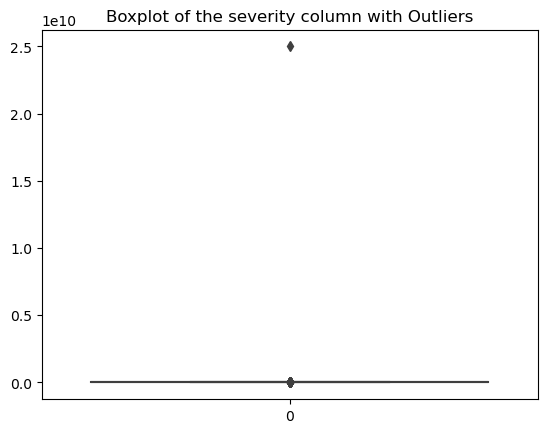

In [149]:
sns.boxplot(severity_of_symptoms['Severity'])
plt.title('Boxplot of the severity column with Outliers')

In [150]:
# finding the limit using Z-Score Method

In [151]:
#upper_limit=severity_of_symptoms['Severity'].mean()+severity_of_symptoms['Severity'].std()
#lower_limit=severity_of_symptoms['Severity'].mean()-severity_of_symptoms['Severity'].std()
#print(upper_limit)
#print(lower_limit)

In [152]:
# finding the outliers

In [153]:
#severity_outliers=severity_of_symptoms.loc[(severity_of_symptoms['Severity']> upper_limit)|(severity_of_symptoms['Severity']< lower_limit)]
#severity_outliers

In [154]:
# Triming the outliers, deleting the outliers

In [155]:
#severity_within_range=severity_of_symptoms.loc[(severity_of_symptoms['Severity']< upper_limit)&(severity_of_symptoms['Severity']> lower_limit)]
#severity_within_range

In [156]:
#print(len(severity_of_symptoms))
#print(len(severity_within_range))
#print(len(severity_of_symptoms)-len(severity_within_range))

In [157]:
#sns.boxenplot(severity_within_range['Severity'])

In [158]:
## Capping The Outliers
###### Changing the outlier values to upper or lower limit values

In [159]:
#severity_within_range=severity_of_symptoms.copy()
#severity_within_range.loc[severity_within_range['Severity']>upper_limit,'Severity']=upper_limit
#severity_within_range.loc[severity_within_range['Severity']<lower_limit,'Severity']=lower_limit

In [160]:
#sns.boxenplot(severity_within_range['Severity'])

In [161]:
#severity_within_range

In [162]:
# Finding the limit using Percentile Method


In [163]:
#upper_limit=severity_of_symptoms['Severity'].quantile(0.99)
#lower_limit=severity_of_symptoms['Severity'].quantile(0.01)
#print(upper_limit)
#print(lower_limit)

In [164]:
#sns.boxenplot(severity_of_symptoms['Severity'])

In [165]:
# Finding the Outliers
#severity_outliers=severity_of_symptoms.loc[(severity_of_symptoms['Severity']> upper_limit)|(severity_of_symptoms['Severity']< lower_limit)]
#severity_outliers

In [166]:
# Trimming the Outliers
#severity_within_range=severity_of_symptoms.loc[(severity_of_symptoms['Severity']< upper_limit)&(severity_of_symptoms['Severity']> lower_limit)]
#severity_within_range

In [167]:
#print(len(severity_of_symptoms))
#print(len(severity_within_range))
#print(len(severity_of_symptoms)-len(severity_within_range))

In [168]:
#sns.boxenplot(severity_within_range['Severity'])

# Finding the limit using IQR Method

In [169]:
q1=severity_of_symptoms['Severity'].quantile(0.25)
q3=severity_of_symptoms['Severity'].quantile(0.75)
iqr=q3-q1

In [170]:
q1,q3,iqr

(103.0, 268.0, 165.0)

In [171]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit, lower_limit

(515.5, -144.5)

<Axes: >

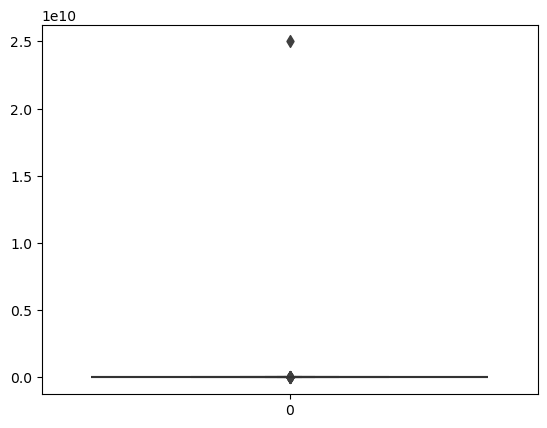

In [172]:
sns.boxenplot(severity_of_symptoms['Severity'])

#### finding the outliers

In [173]:
severity_outliers=severity_of_symptoms.loc[(severity_of_symptoms['Severity']> upper_limit)|(severity_of_symptoms['Severity']< lower_limit)]
severity_outliers

,Severity
10,1189
28,625
34,743
49,830
54,526
55,653
56,24995107579
57,836
61,569
71,595


#### Triming the outliers, deleting the outliers

In [174]:
severity_within_range=severity_of_symptoms.loc[(severity_of_symptoms['Severity']< upper_limit)&(severity_of_symptoms['Severity']> lower_limit)]
severity_within_range

,Severity
0,100
1,99
2,99
3,99
4,101
...,...
544,169
546,100
547,260
548,15


In [175]:
print(len(severity_of_symptoms))
print(len(severity_within_range))
print(len(severity_of_symptoms)-len(severity_within_range))

550
498
52


Text(0.5, 1.0, 'Boxplot After Trimming the Outliers')

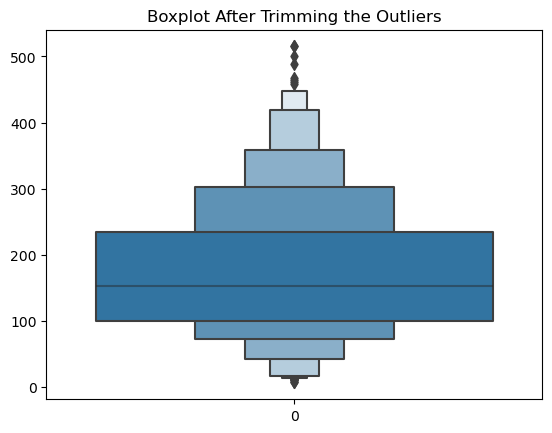

In [176]:
sns.boxenplot(severity_within_range['Severity'])
plt.title('Boxplot After Trimming the Outliers')

Text(0.5, 1.0, 'Histogram of Severity of Symptoms')

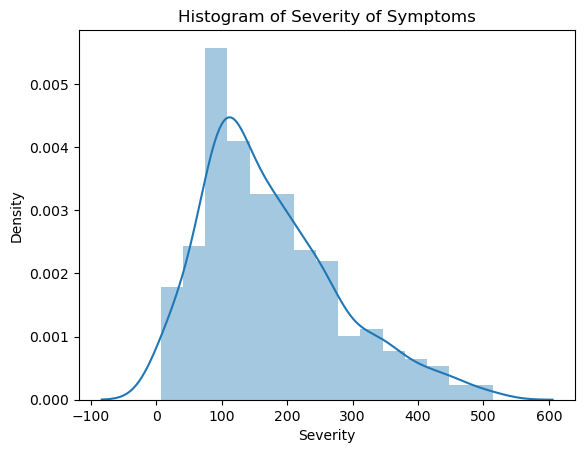

In [177]:
sns.distplot(severity_within_range['Severity']);
plt.title('Histogram of Severity of Symptoms')

## Capping The Outliers
###### Changing the outlier values to upper or lower limit values

In [178]:
severity_within_range=severity_of_symptoms.copy()
severity_within_range.loc[severity_within_range['Severity']>upper_limit,'Severity']=upper_limit
severity_within_range.loc[severity_within_range['Severity']<lower_limit,'Severity']=lower_limit

Text(0.5, 1.0, 'Boxplot after capping the upper and the lower limit of the outliers')

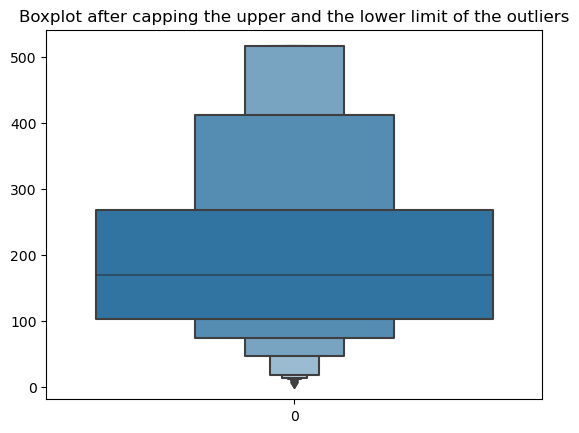

In [179]:
sns.boxenplot(severity_within_range['Severity'])
plt.title('Boxplot after capping the upper and the lower limit of the outliers')

In [180]:
bins=np.linspace(min(severity_within_range['Severity']),max(severity_within_range['Severity']),7)

In [181]:
binn_severe=['Mild','Moderate','Severe','Varied','ICU','non-ICU']

In [182]:
severity_within_range['severe_binned']=pd.cut(severity_within_range['Severity'], bins,labels=binn_severe,include_lowest=True)

In [183]:
severity_within_range=severity_within_range.sort_values('Severity',ascending=True)
severity_within_range

,Severity,severe_binned
418,7.0,Mild
333,7.0,Mild
198,11.0,Mild
472,11.0,Mild
219,12.0,Mild
...,...,...
146,515.5,non-ICU
61,515.5,non-ICU
34,515.5,non-ICU
306,515.5,non-ICU


In [184]:
severity_within_range['severe_binned'].unique()

['Mild', 'Moderate', 'Severe', 'Varied', 'ICU', 'non-ICU']
Categories (6, object): ['Mild' < 'Moderate' < 'Severe' < 'Varied' < 'ICU' < 'non-ICU']

#### The subplot gives the visual representation of severity of symptoms category and their respective percentages displayed on the pie chat

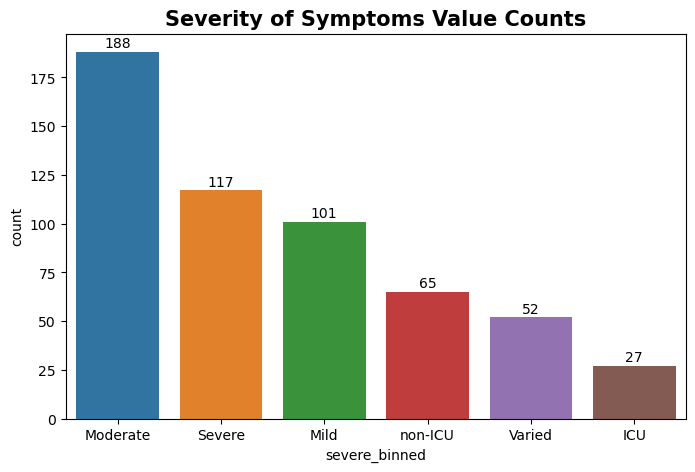

In [185]:
fig,l = plt.subplots(figsize = (8,5))
sns.countplot(severity_within_range, x = 'severe_binned', ax = l,
              order=severity_within_range['severe_binned'].value_counts()\
              .sort_values(ascending=False).index)

for rect in l.patches:
    height = rect.get_height()
    l.annotate(text = f"{numerize.numerize(height)}", 
               xy = (rect.get_x()+rect.get_width()/2, height), 
               xytext = (0,1), 
               textcoords = "offset points", 
               ha = "center", 
               va = "bottom", 
               color = "black")

l.set_title("Severity of Symptoms Value Counts", fontsize = 15, fontweight = "bold", color = "black")
fig.show()


In [186]:
# A function to calculate the numeric values and their equivalent percentage values to pie charts

total_rows=550 
def pie_percentage(nums):
  
    return '{:.1f}%\n{:.0f}'.format(nums,total_rows*nums/100)

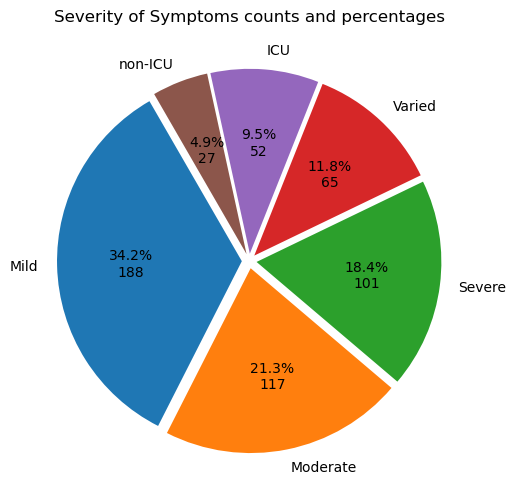

In [187]:
plt.figure(figsize=(8,6))
plt.pie(severity_within_range['severe_binned'].value_counts(),
        labels=severity_within_range['severe_binned'].unique(),autopct=pie_percentage,
        explode=[0.04,0.04,0.04,0.04,0.04,0.04],startangle=120)

plt.title('Severity of Symptoms counts and percentages')
plt.show()

###### The isk factor csv file was imported to jupyter noteboot and the severity of symptoms column was extracted to be analize and visualize. the extracted column is converted to a dataframe  "Severity_of_symptoms." Boxplot and IQR method were used to view, find, and trim 52 outliers out of 550 records from the "Severity_of_symptoms"  dataframe. The extracted dataframe without the outliers was labeled as "severity_within_range" The severity_within_range dataframe was binned as a new column, "severe binned" into mild, Moderate, Severe, Varied, ICU, and non-ICU categories. The bar plot and the pie plot shows the value counts and the percentages of each bin out of the total of 498 severe case,  Mild (101,18.4%), moderate (188, 34.2%), Severe (117, 21.3%), Varied (52, 9.5%), ICU (27,4.9%), and non-ICU (65,11.8%)  respectively.

## Mortality Rate

In [188]:
mortality_rate=risk_factors[risk_factors['Discharge vs. death?'].notna()] 
mortality_rate.tail(5)

,Date,Study,Study Link,Journal,Severe,Severe lower bound,Severe upper bound,Severe p-value,Severe Significant,Severe Adjusted,...,Fatality Calculated,Multivariate adjustment,Study Type,Sample Size,Study Population,Added on,Critical only,Discharged vs. death?,Critical only?,Discharge vs. death?
694,2020-04-24,"COVID-19 in Iran, a comprehensive investigatio...",https://doi.org/10.1101/2020.04.20.20072421,medrxiv,OR 3.04,0.98,9.46,0.06,Not Significant,Not Adjusted,...,NaN,NaN,Retrospective observational study,100,YAS hospital affiliated to Tehran University o...,NaN,Y,NaN,NaN,N
695,2020-04-23,Risk factors of critical & mortal COVID-19 cas...,https://doi.org/10.1016/j.jinf.2020.04.021,Journal of Infection,OR: 2.72,1.60,4.64,NaN,Significant,Not Adjusted,...,NaN,NaN,Systematic review and meta-analysis,3028 patients from 13 studies,China,NaN,Y,NaN,NaN,N
696,2020-04-23,Impaired type I interferon activity and exacer...,https://www.medrxiv.org/content/10.1101/2020.0...,medrxiv,OR 2.86,0.82,9.99,0.1,Not Significant,Not Adjusted,...,NaN,NaN,Retrospective observational study,50,PCR-confirmed COVID-19 cases without comorbidi...,NaN,Y,NaN,NaN,N
697,2020-04-23,Clinical Characteristics of Hospitalized Covid...,http://medrxiv.org/cgi/content/short/2020.04.1...,MedRxiv,NaN,NaN,NaN,NaN,NaN,NaN,...,Calculated,NaN,Retrospective observational study,2199,"Mount Sinai Hospital located in East Harlem, M...",NaN,N,NaN,NaN,Y
698,2020-04-23,Venous and arterial thromboembolic complicatio...,doi.org/10.1016/j.thromres.2020.04.024,Thrombosis Research,OR 0.87,0.50,1.51,0.62,NaN,NaN,...,NaN,NaN,Retrospective observational study,388,"Humanitas Clinical and Research Hospital, sin...",NaN,Y,NaN,NaN,N


In [189]:
mortality_rate.shape

(100, 27)

In [190]:
mortality_rate=mortality_rate[['Sample Size','Discharge vs. death?']]
mortality_rate

,Sample Size,Discharge vs. death?
599,"21 Studies, 47,344 patients",N
600,221,N
601,134,N
602,476,N
603,13442,N
...,...,...
694,100,N
695,3028 patients from 13 studies,N
696,50,N
697,2199,Y


In [191]:
mortality_rate['Discharge vs. death?'].value_counts()

N    88
Y    12
Name: Discharge vs. death?, dtype: int64

In [192]:
mortality_rate.reset_index(drop=True,inplace=True)
mortality_rate

,Sample Size,Discharge vs. death?
0,"21 Studies, 47,344 patients",N
1,221,N
2,134,N
3,476,N
4,13442,N
...,...,...
95,100,N
96,3028 patients from 13 studies,N
97,50,N
98,2199,Y


In [193]:
mortality_rate.shape

(100, 2)

In [194]:
#path='C:\\Users\\Maliuran\\Documents\\AXIA HUB\\PYTHON\\3MTT\\3MTT Capstone Extract\\Kaggle\\target_tables\\capstone\\convert to csv\\mortality_rate.csv'
#mortality_rate.to_csv(path)

In [195]:
dbcon=pymysql.connect(host='localhost', user='root',passwd='Mysql@01',database='3mtt_capstone')

In [196]:
mortality_rate=pd.read_sql_query("""select Sample_size,Discharge_vs_death
from mortality_rate;""",dbcon,parse_dates=True)
mortality_rate

,Sample_size,Discharge_vs_death
0,221,N
1,134,N
2,476,N
3,1157,N
4,299,N
5,1317,N
6,1158,N
7,1158,N
8,1158,N
9,9519,N


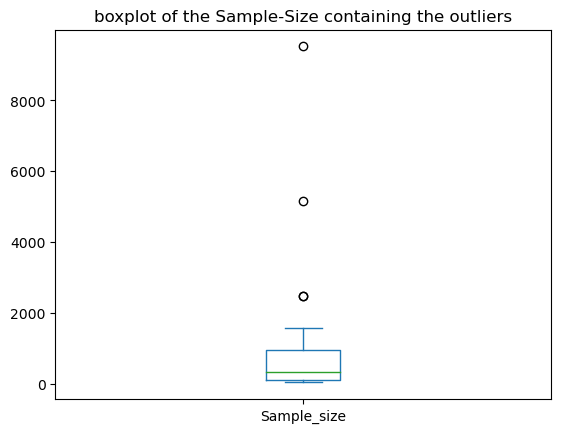

In [197]:
mortality_rate['Sample_size'].plot(kind='box')
plt.title('boxplot of the Sample-Size containing the outliers');

In [198]:
q1=mortality_rate['Sample_size'].quantile(0.25)
q3=mortality_rate['Sample_size'].quantile(0.75)
iqr=q3-q1

In [199]:
q1,iqr,q3

(112.5, 834.5, 947.0)

In [200]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit, lower_limit

(2198.75, -1139.25)

#### Locating the outliers from the dataframe

In [201]:
mortality_rate_outliers=mortality_rate.loc[(mortality_rate['Sample_size']> upper_limit)|(mortality_rate['Sample_size']< lower_limit)]
mortality_rate_outliers

,Sample_size,Discharge_vs_death
9,9519,N
14,2490,N
15,2490,N
23,5172,N


#### Removing the outliers from the dataframe

In [202]:
mortality_rate_within_range=mortality_rate.loc[(mortality_rate['Sample_size']< upper_limit)&(mortality_rate['Sample_size']> lower_limit)]
mortality_rate_within_range

,Sample_size,Discharge_vs_death
0,221,N
1,134,N
2,476,N
3,1157,N
4,299,N
5,1317,N
6,1158,N
7,1158,N
8,1158,N
10,81,N


In [203]:
print(len(mortality_rate))
print(len(mortality_rate_within_range))
print(len(mortality_rate)-len(mortality_rate_within_range))

47
43
4


Text(0.5, 1.0, 'The boxplot after removing the outliers')

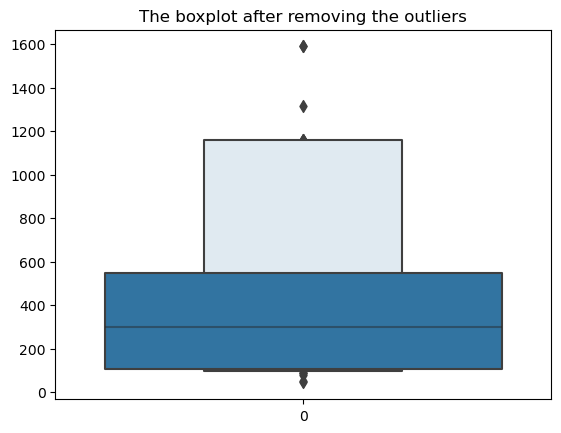

In [204]:
sns.boxenplot(mortality_rate_within_range['Sample_size'])
plt.title('The boxplot after removing the outliers')

In [205]:
mortality_rate_within_range

,Sample_size,Discharge_vs_death
0,221,N
1,134,N
2,476,N
3,1157,N
4,299,N
5,1317,N
6,1158,N
7,1158,N
8,1158,N
10,81,N


In [206]:
total_rows=47
def pie_percentage(nums):
  
    return '{:.1f}%\n{:.0f}'.format(nums,total_rows*nums/100)

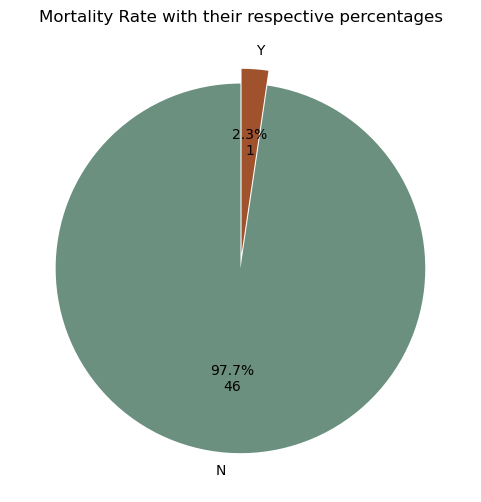

In [207]:
plt.figure(figsize=(6,6))
plt.pie(mortality_rate_within_range['Discharge_vs_death'].value_counts(),
        labels=mortality_rate_within_range['Discharge_vs_death'].unique(),autopct=pie_percentage,
        colors=['#6b9080','sienna'],explode=[0.04,0.04],startangle=90)

plt.title('Mortality Rate with their respective percentages')
plt.show()

In [208]:
Sample_size_mortality_rate=pd.read_sql_query("""select Discharge_vs_death, sum(Sample_Size) as Sample_size_total
from mortality_rate
group by Discharge_vs_death;""",dbcon,parse_dates=True)
Sample_size_mortality_rate

,Discharge_vs_death,Sample_size_total
0,N,38101.0
1,Y,904.0


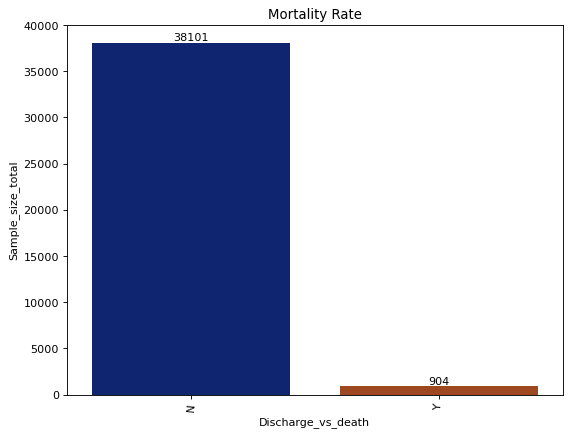

In [209]:
plt.figure(figsize=(8,6), dpi=80)
plt.xticks(rotation=85)
plt.title('Mortality Rate')

ax = sns.barplot(x='Discharge_vs_death', y='Sample_size_total', data=Sample_size_mortality_rate,errwidth=0,palette='dark') 
for i in ax.containers:
    ax.bar_label(i,)

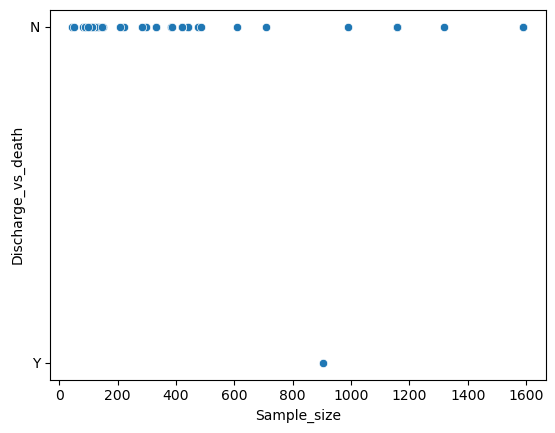

In [210]:
sns.scatterplot(x=mortality_rate_within_range.Sample_size, y=mortality_rate_within_range.Discharge_vs_death);